In [84]:
import sys


import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")

sys.path.append('/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/_active_experiments/FixationGrower')

import config_alpha_experiment as alpha_config

%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [256]:
ANIMALS = [
    "R040",
    "R041",
    "R042",
    "R043",
    "R044",
    "R045",
    "R046",
    "R047",
    "R048",
    "R049",
    "R050",
    "R051",
    "R052",
    "R053",
    "R054",
    "R055",
    "R056",
    "R057",
]

date_min = "2024-07-20"
date_max = "2024-08-23"

tdf = ingest.create_trials_df.create_trials_df_from_dj(ANIMALS, date_min, date_max)
ddf = ingest.create_days_df.create_days_df_from_dj(ANIMALS, date_min, date_max)

[2024-08-23 12:16:58,518][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id R040


OperationalError: (2003, "Can't connect to MySQL server on 'bdata00.pni.princeton.edu' (timed out)")

In [ ]:
tdf = ingest.drop_dates(tdf, alpha_config.ALPHA_DATE_DROPS)
ddf = ingest.drop_dates(ddf, alpha_config.ALPHA_DATE_DROPS)
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)

dropping R046 2024-08-12 length: 152079
length: 151823
dropping R052 2024-08-14 length: 151823
length: 151492
dropping R046 2024-08-12 length: 536
length: 535
dropping R052 2024-08-14 length: 535
length: 534


# 1. Fixed Growth Rates

## 1.1 Simulate Fixed Growth Potential

Last meeting when looking at the delta delay plots, Julie asked what the *maximum* growth a v1 animal could have if they didn't violate given the trial numbers. This is the ceiling of their growth. We want to see this compared to their actual growth as well as the V2 growth.

### 1.1.1. No violations

In [28]:
fixed_growth_df = viz.FixationGrower.df_preperation.simulate_fixed_growth_data(
    tdf, relative_stage=5
)

fixed_growth_df["V1_true_delta"] = fixed_growth_df.groupby(
    "animal_id"
).max_fixation_dur.diff()

fixed_growth_df["V1_simulated_ceiling"] = (
    fixed_growth_df["simulated_max_fixation_dur"]
    - fixed_growth_df["prev_day_max_fixation_dur"]
)
v1_plot_df = fixed_growth_df.melt(
    id_vars=["animal_id", "days_relative_to_stage_5"],
    value_vars=["V1_true_delta", "V1_simulated_ceiling"],
    var_name="delta_type",
    value_name="fixation_delta",
)

[Text(0.5, 0, 'Days Relative to Stage 5'),
 Text(0, 0.5, 'Fixation Duration Delta (ms)'),
 Text(0.5, 1.0, 'V1 Fixation Dur Simulated Ceiling vs True Delta'),
 (-0.5, 1.0)]

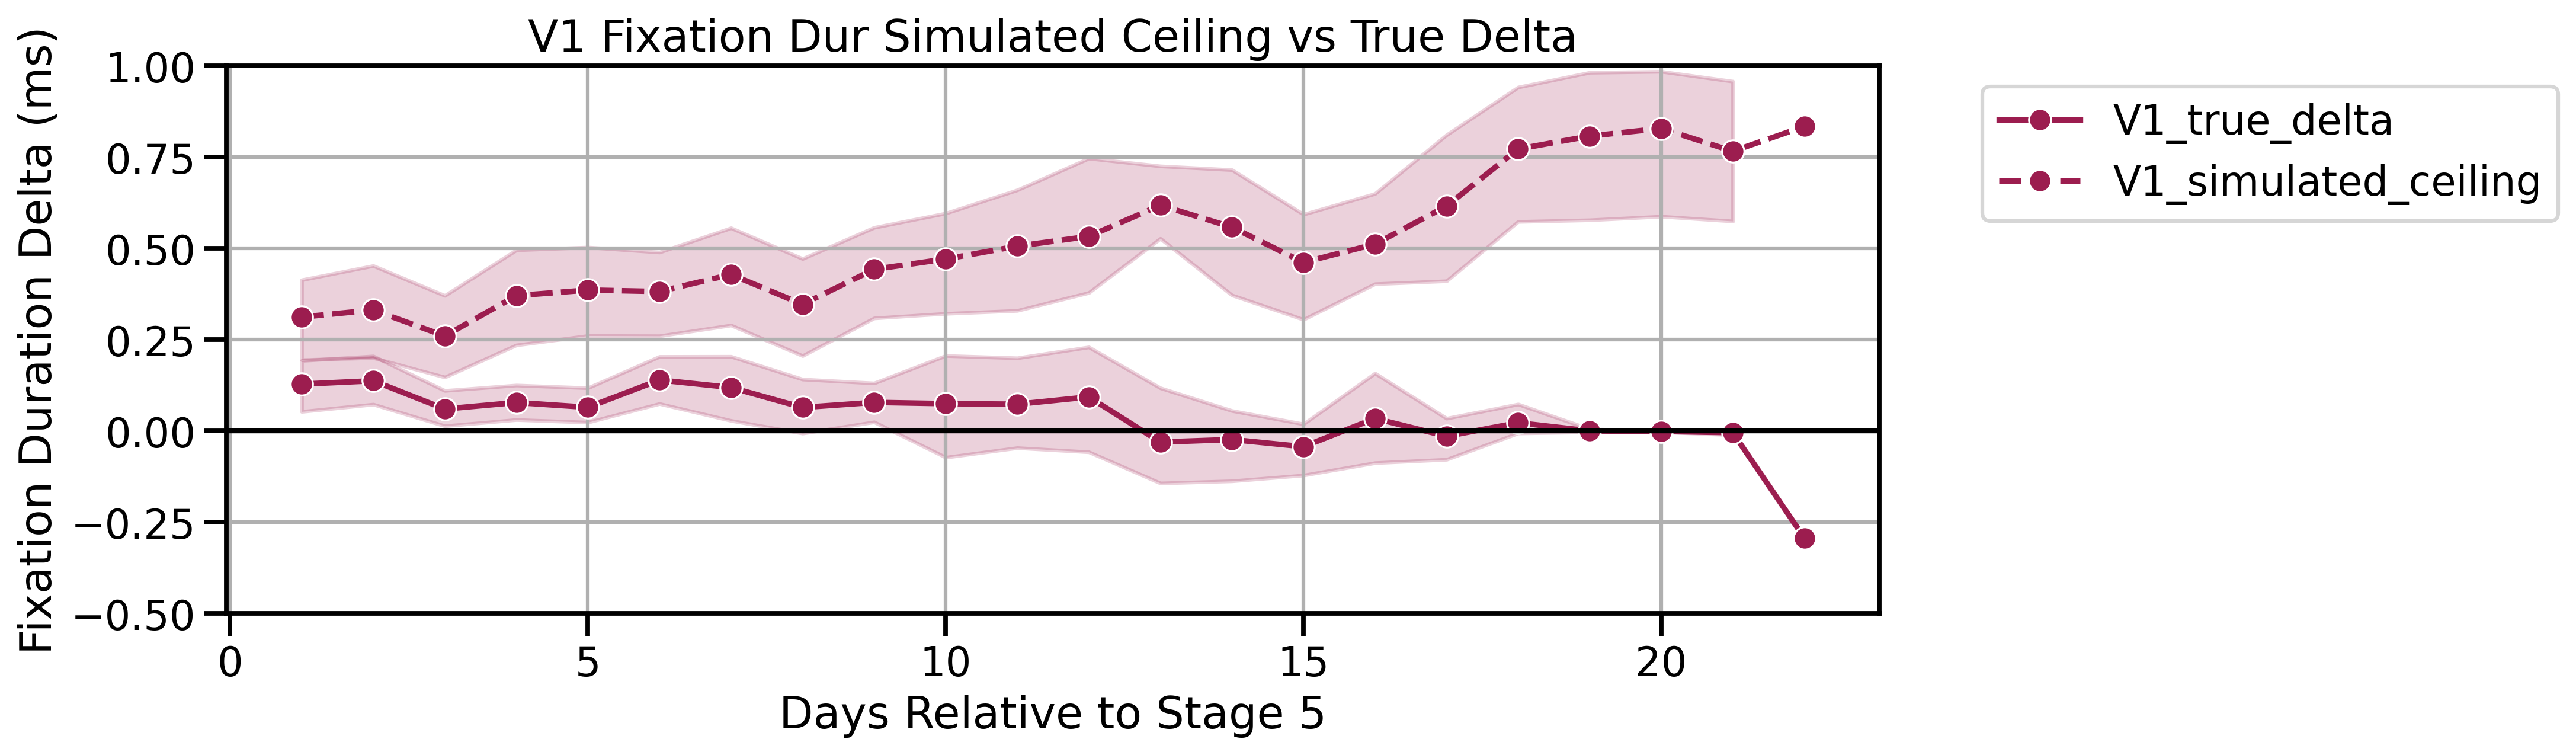

In [113]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=v1_plot_df,
    x="days_relative_to_stage_5",
    y="fixation_delta",
    style="delta_type",
    color=pu.ALPHA_V1_color,
    # hue_order=["V1_true_delta", "V1_simulated_ceiling"],
    # palette=[pu.ALPHA_V1_color, ALPHA_V1_color],
    marker="o",
    ax=ax,
)
ax.axhline(0, color="k", lw=2)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set(
    xlabel="Days Relative to Stage 5",
    ylabel="Fixation Duration Delta (ms)",
    title="V1 Fixation Dur Simulated Ceiling vs True Delta",
    ylim=(-0.5, 1),
)

[Text(0.5, 0, 'Days Relative to Stage 5'),
 Text(0, 0.5, 'Fixation Duration Delta (ms)'),
 Text(0.5, 1.0, 'V1 Fixation Dur Simulated Ceiling vs True Delta')]

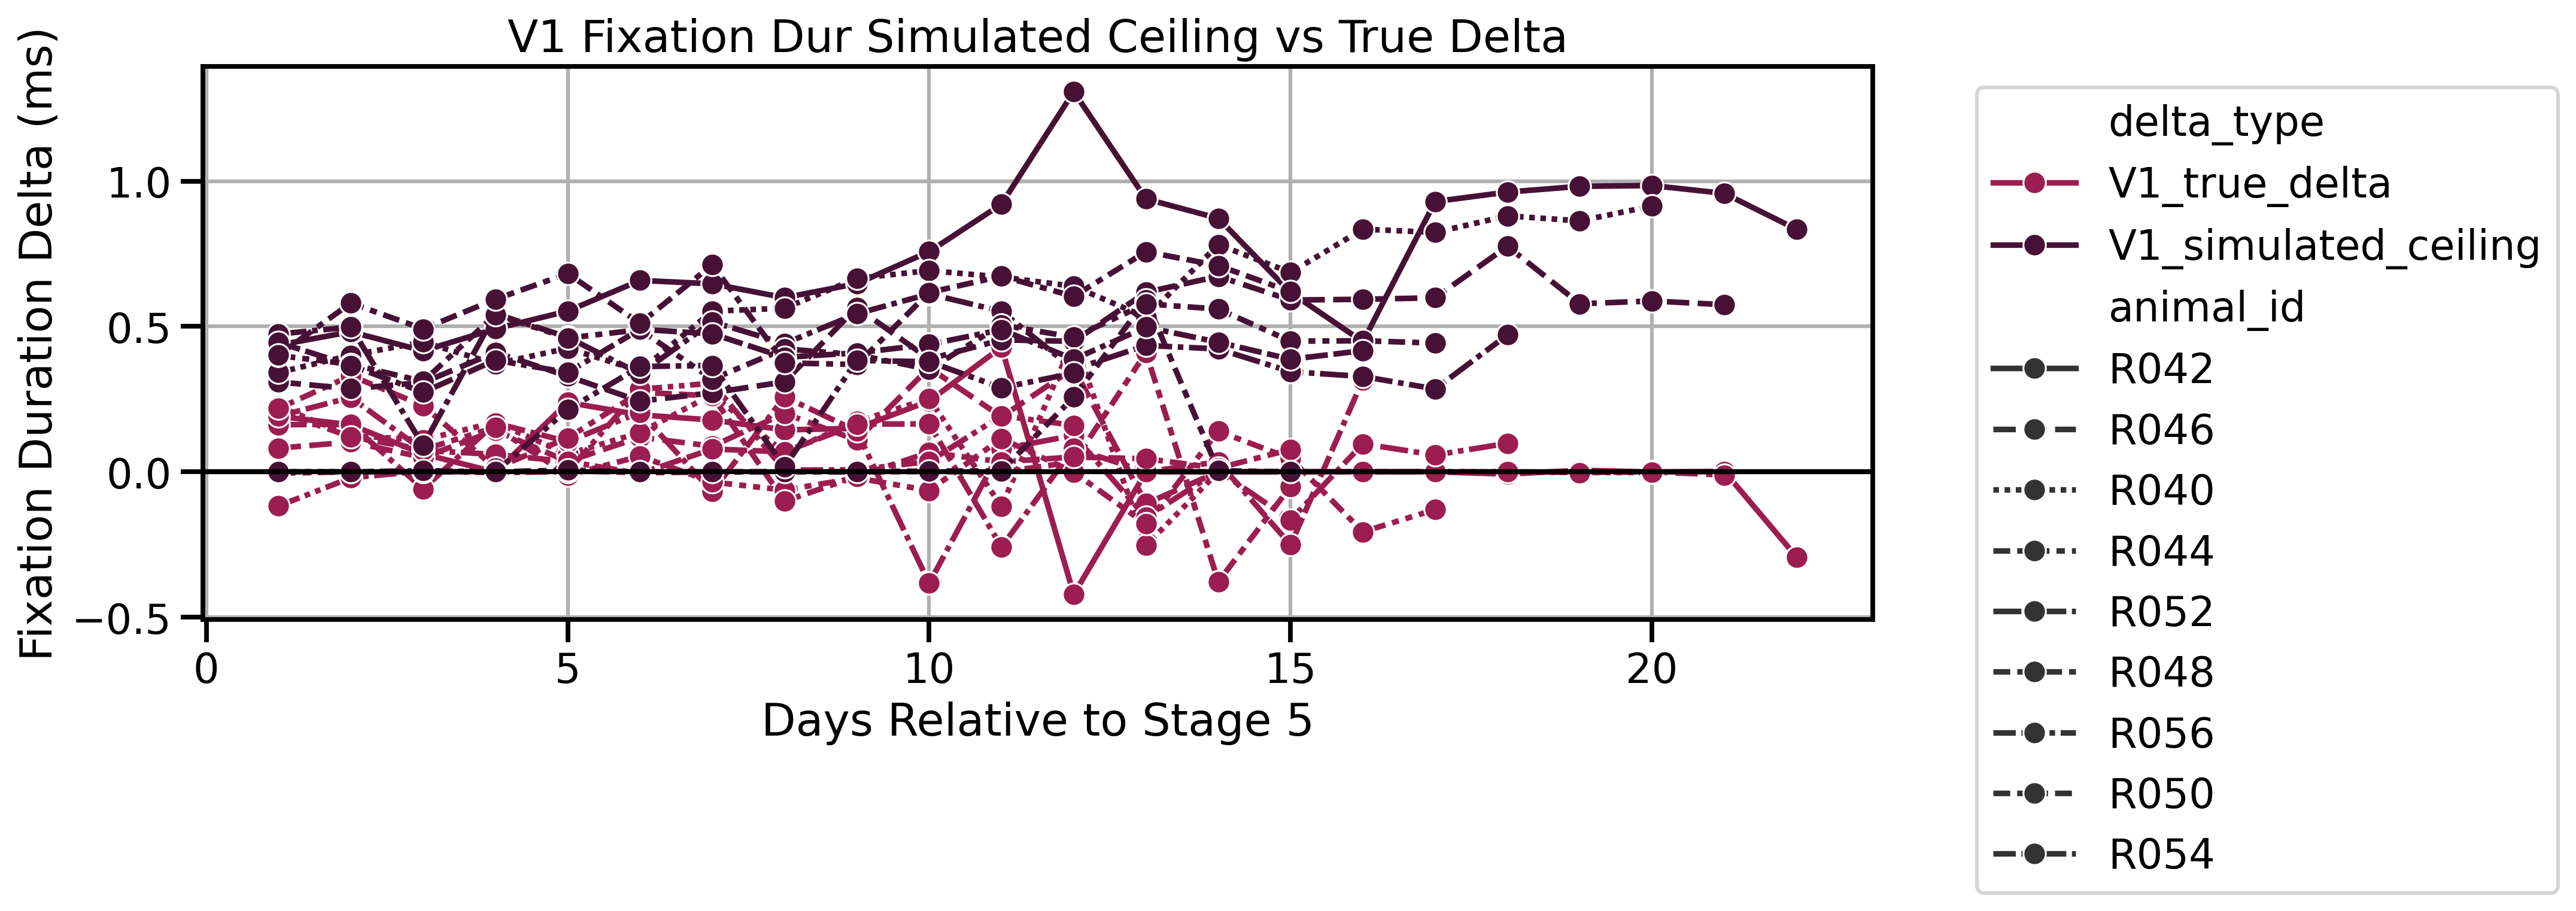

In [114]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=v1_plot_df,
    x="days_relative_to_stage_5",
    y="fixation_delta",
    hue="delta_type",
    hue_order=["V1_true_delta", "V1_simulated_ceiling"],
    palette=[pu.ALPHA_V1_color, "#471136"],
    marker="o",
    ax=ax,
    style="animal_id",
)
ax.axhline(0, color="k", lw=2)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set(
    xlabel="Days Relative to Stage 5",
    ylabel="Fixation Duration Delta (ms)",
    title="V1 Fixation Dur Simulated Ceiling vs True Delta",
)

### 1.1.2 25% violations

In [120]:
fixed_growth_df = viz.FixationGrower.df_preperation.simulate_fixed_growth_data(
    tdf, relative_stage=5, viol_rate=0.25
)

fixed_growth_df["V1_true_delta"] = fixed_growth_df.groupby(
    "animal_id"
).max_fixation_dur.diff()

fixed_growth_df["V1_simulated_25_ceiling"] = (
    fixed_growth_df["simulated_max_fixation_dur"]
    - fixed_growth_df["prev_day_max_fixation_dur"]
)
v1_plot_df = fixed_growth_df.melt(
    id_vars=["animal_id", "days_relative_to_stage_5"],
    value_vars=["V1_true_delta", "V1_simulated_25_ceiling"],
    var_name="delta_type",
    value_name="fixation_delta",
)

[Text(0.5, 0, 'Days Relative to Stage 5'),
 Text(0, 0.5, 'Fixation Duration Delta (ms)'),
 Text(0.5, 1.0, 'V1 Fixation Dur Simulated Ceiling vs True Delta'),
 (-0.5, 1.0)]

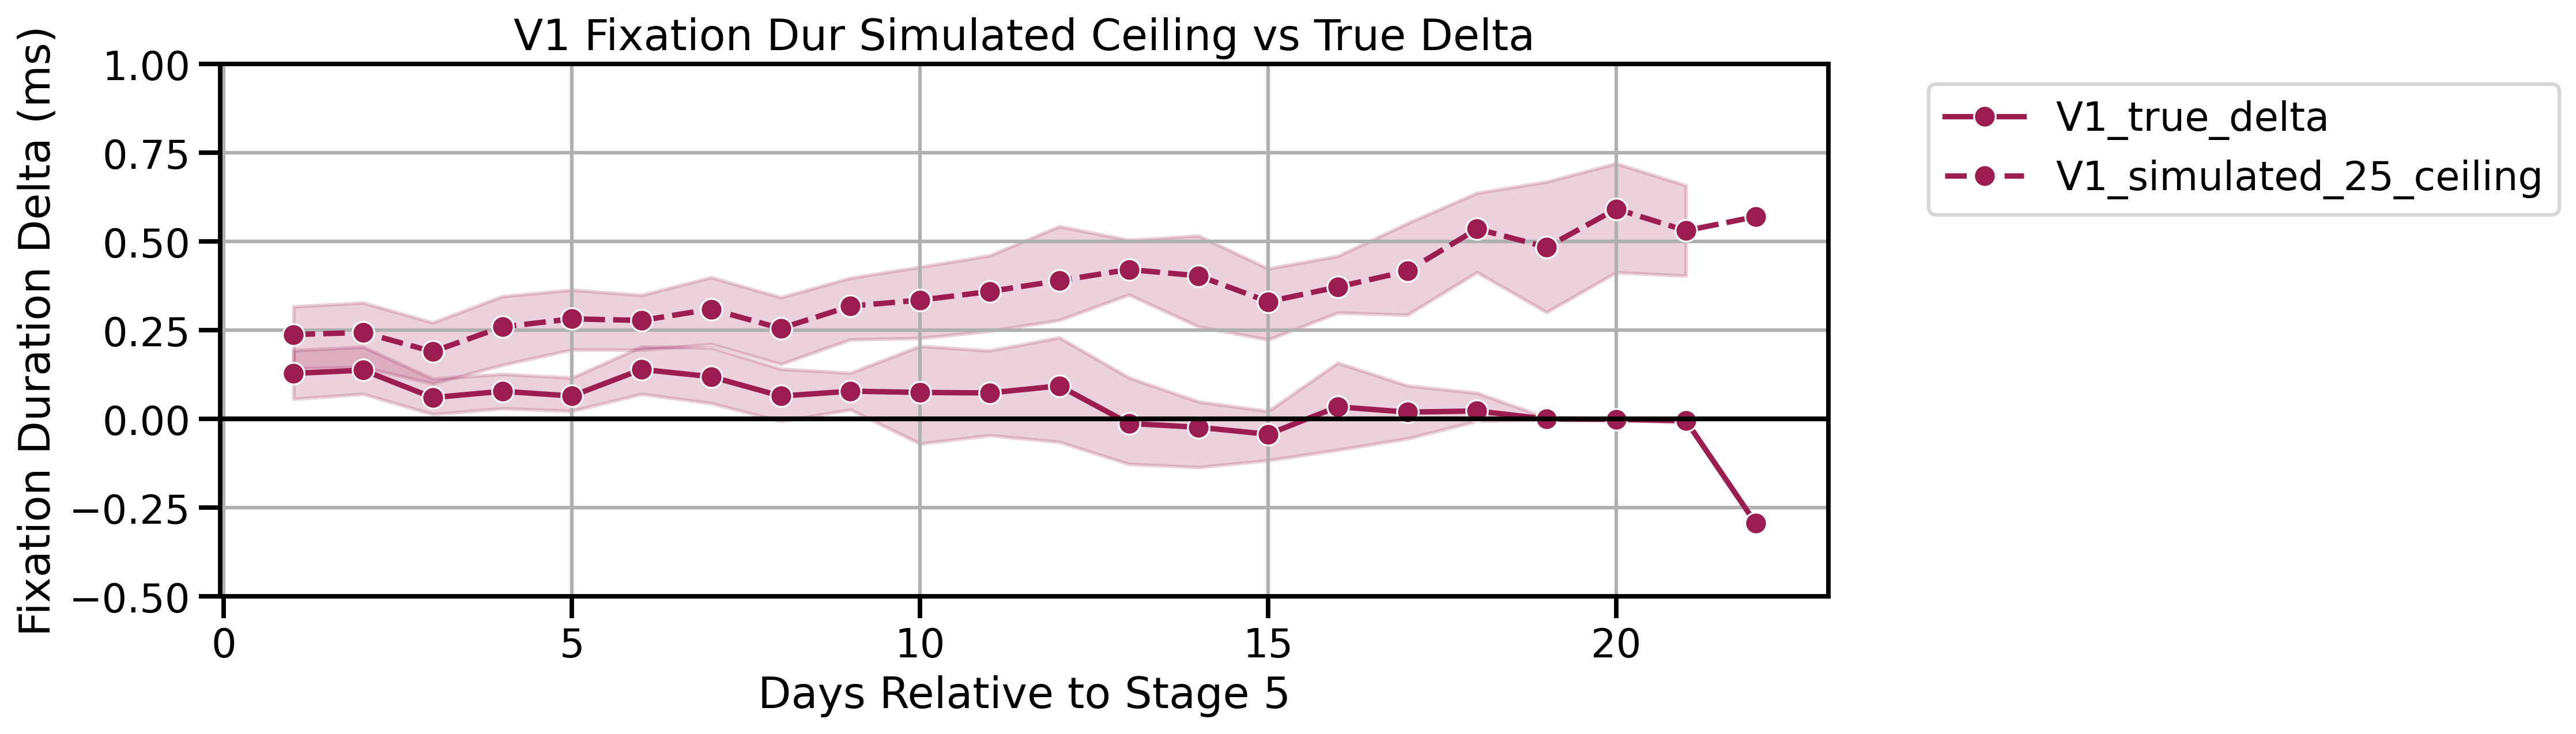

In [121]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=v1_plot_df,
    x="days_relative_to_stage_5",
    y="fixation_delta",
    style="delta_type",
    color=pu.ALPHA_V1_color,
    marker="o",
    ax=ax,
)
ax.axhline(0, color="k", lw=2)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set(
    xlabel="Days Relative to Stage 5",
    ylabel="Fixation Duration Delta (ms)",
    title="V1 Fixation Dur Simulated Ceiling vs True Delta",
    ylim=(-0.5, 1),
)

### 1.1.3 Compare to V2

Want to be able to plot V1 potential growth vs V1 true growth as well as V2 true growth. This isn't pretty, but it's what it is for now.

In [116]:
fix_delta_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(
    tdf.query("stage < 8").copy()
)
shared_cols = [
    "date",
    "animal_id",
    "stage",
    "days_relative_to_stage_5",
    "fix_experiment",
]
fixed_growth_df["fix_experiment"] = "V1"

plot_df = pd.merge(
    fix_delta_df,
    fixed_growth_df[shared_cols + ["V1_simulated_ceiling"]],
    on=shared_cols,
    how="left",
)
plot_df.rename(
    columns={
        "fixation_delta": "true_delta",
        "V1_simulated_ceiling": "simulated_ceiling",
    },
    inplace=True,
)

melted_plot_df = plot_df.melt(
    id_vars=shared_cols,
    value_vars=["true_delta", "simulated_ceiling"],
    var_name="delta_type",
    value_name="delta",
)

melted_plot_df.head()

date animal_id  stage  days_relative_to_stage_5 fix_experiment  \
0  2024-07-30      R041    5.0                         0             V2   
1  2024-07-30      R042    5.0                         0             V1   
2  2024-07-30      R043    5.0                         0             V2   
3  2024-07-30      R045    5.0                         0             V2   
4  2024-07-30      R046    5.0                         0             V1   

   delta_type  delta  
0  true_delta    NaN  
1  true_delta    NaN  
2  true_delta    NaN  
3  true_delta    NaN  
4  true_delta    NaN

[(-0.5, 0.7)]

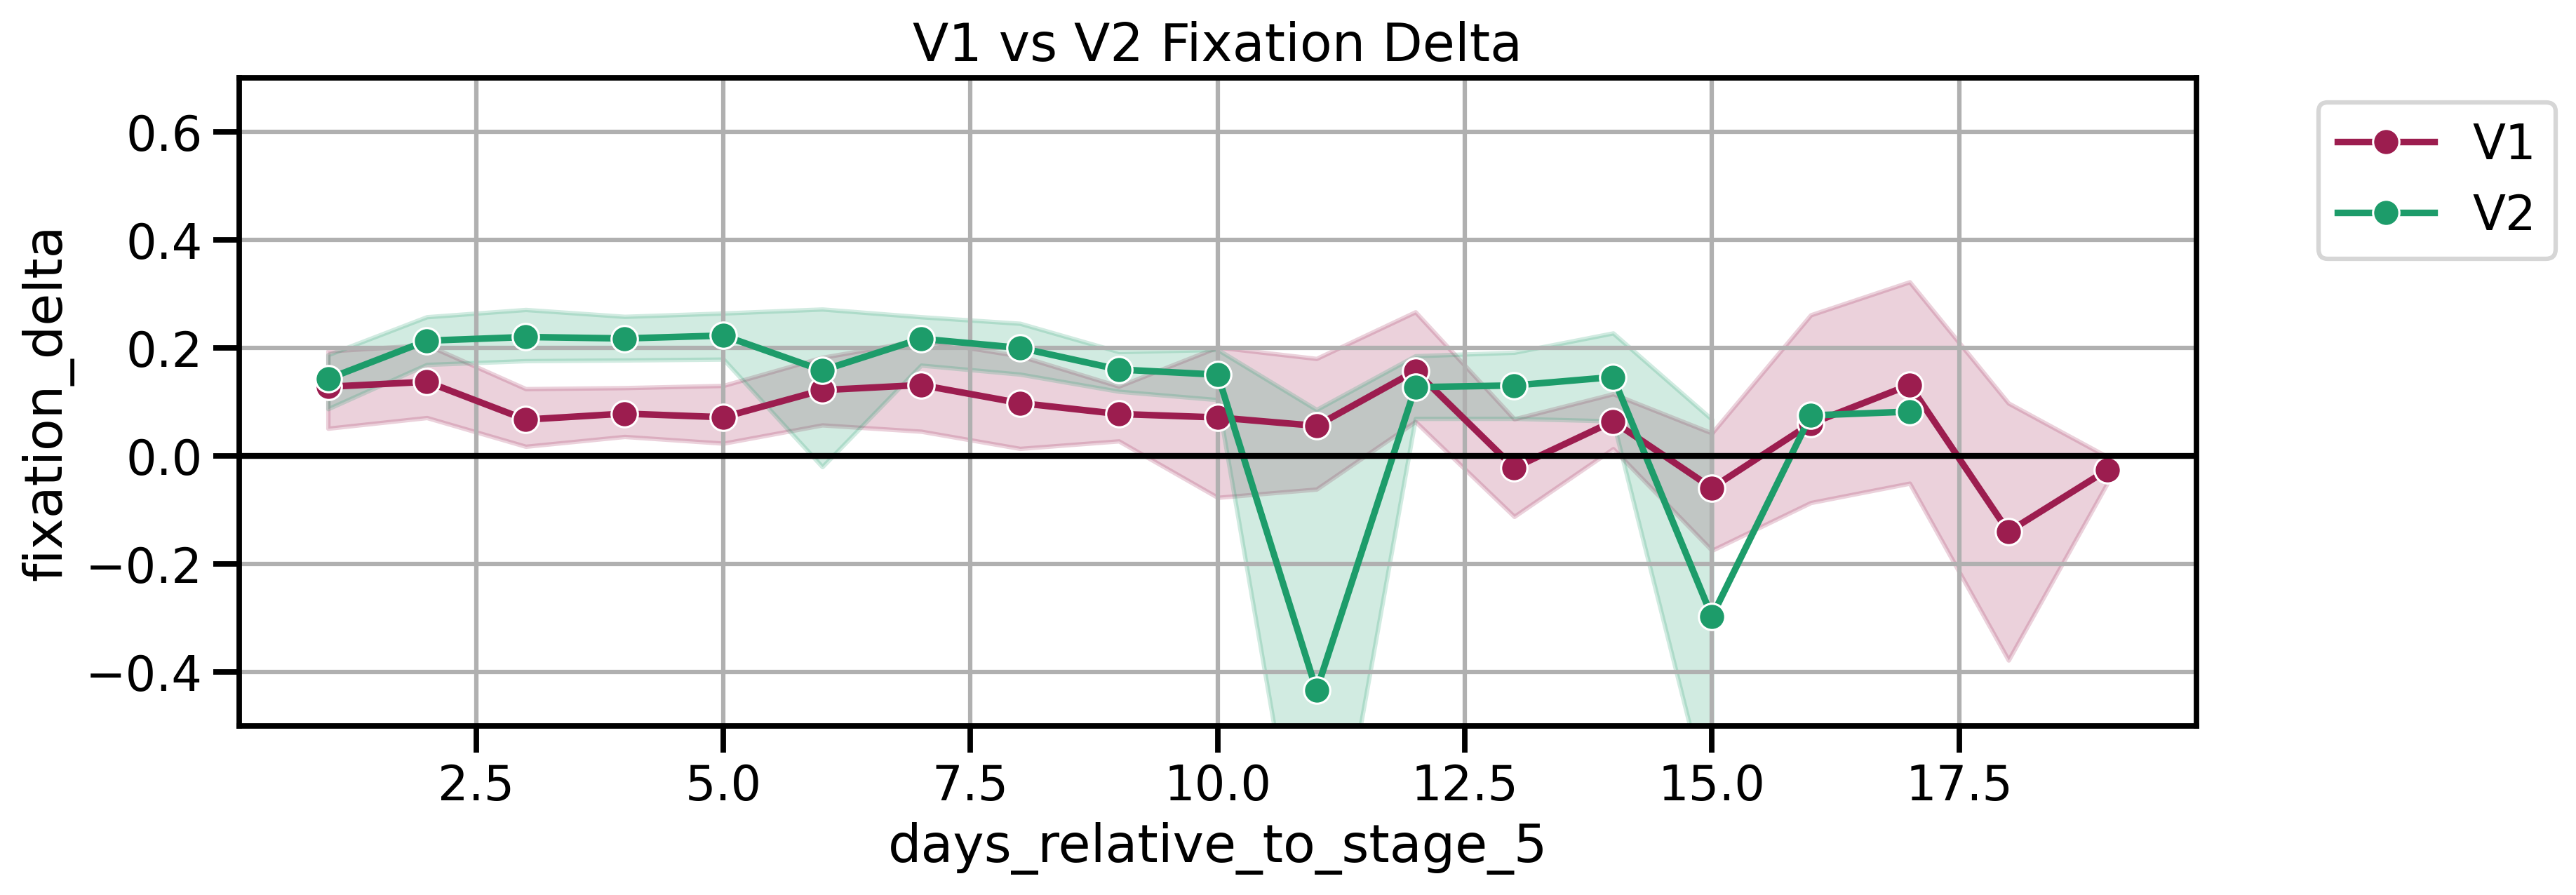

In [117]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=fix_delta_df,
    x="days_relative_to_stage_5",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    marker="o",
    ax=ax,
)
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Delta")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(0, color="k", lw=2)
ax.set(ylim=(-0.5, 0.7))

[(-0.5, 0.7)]

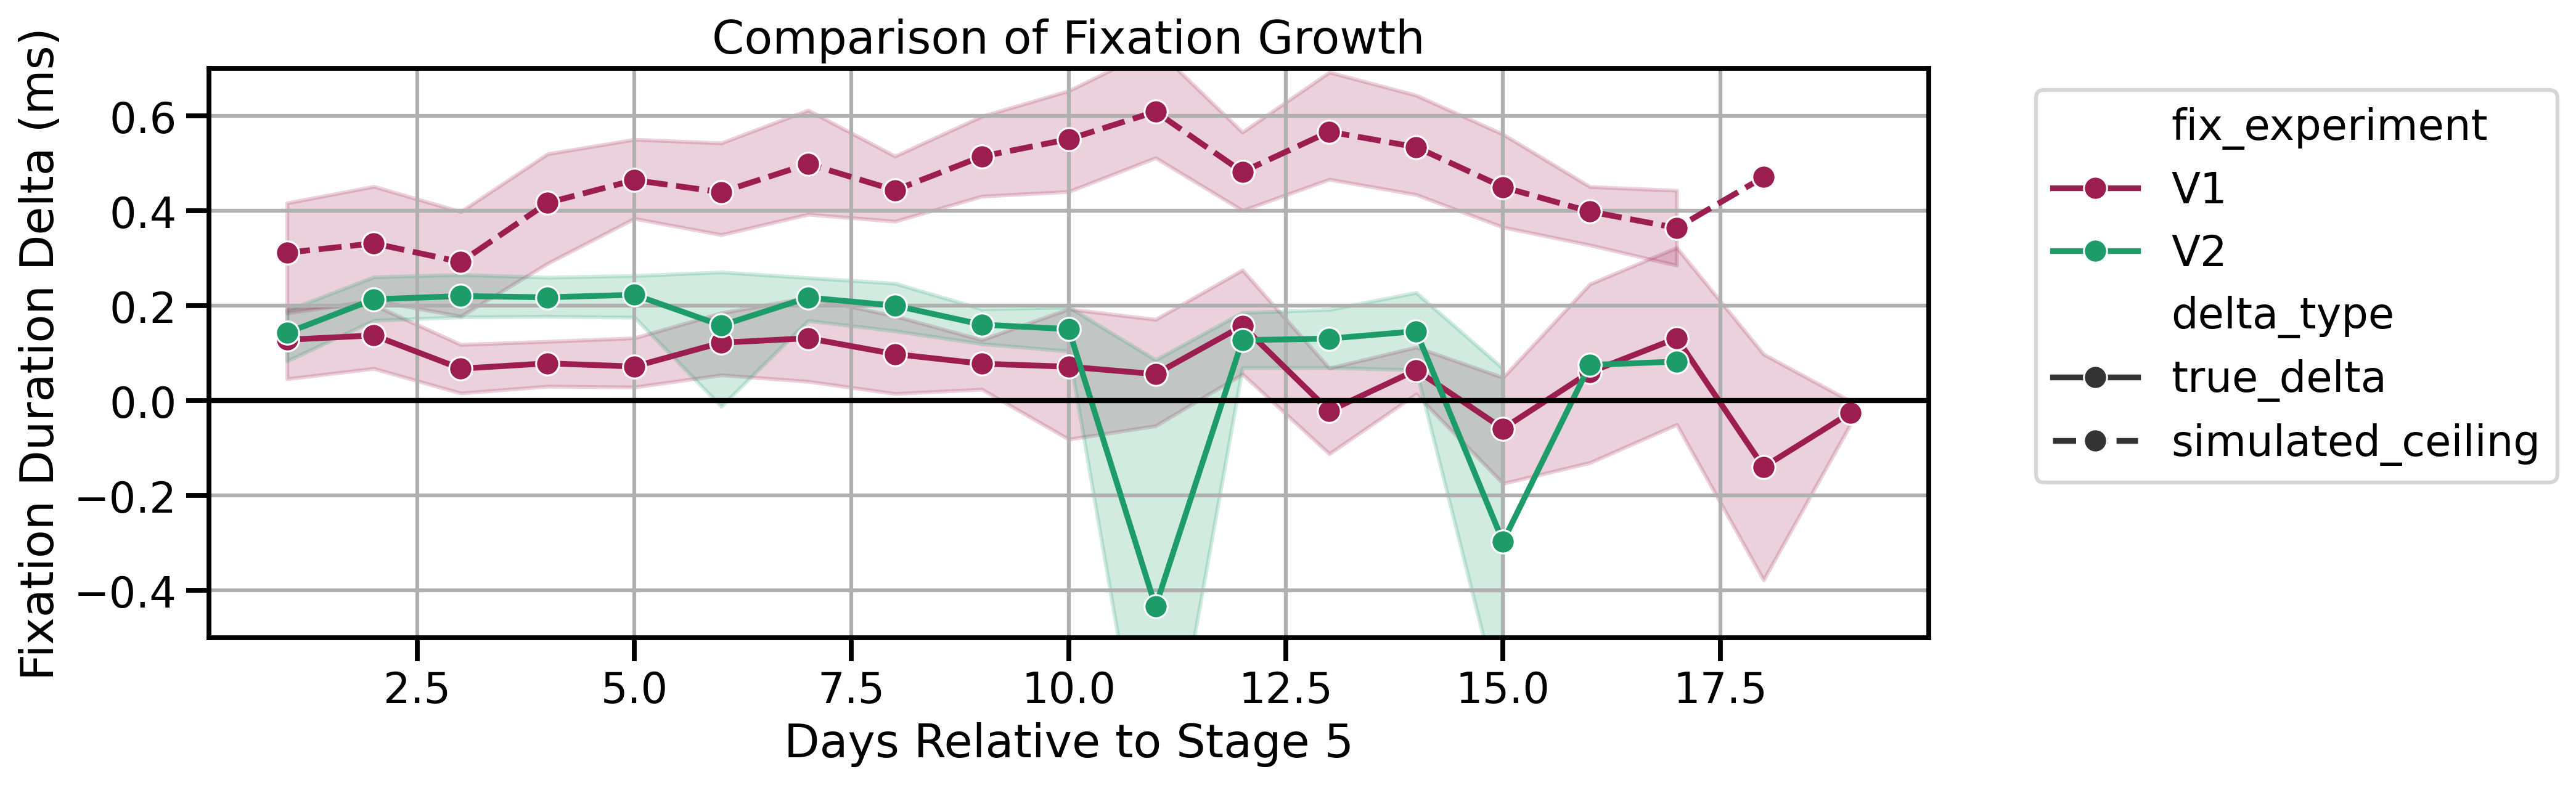

In [110]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=melted_plot_df,
    x="days_relative_to_stage_5",
    y="delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    marker="o",
    style="delta_type",
    ax=ax,
)
ax.axhline(0, color="k", lw=2)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set(
    xlabel="Days Relative to Stage 5",
    ylabel="Fixation Duration Delta (ms)",
    title="Comparison of Fixation Growth",
)
ax.set(ylim=(-0.5, 0.7))

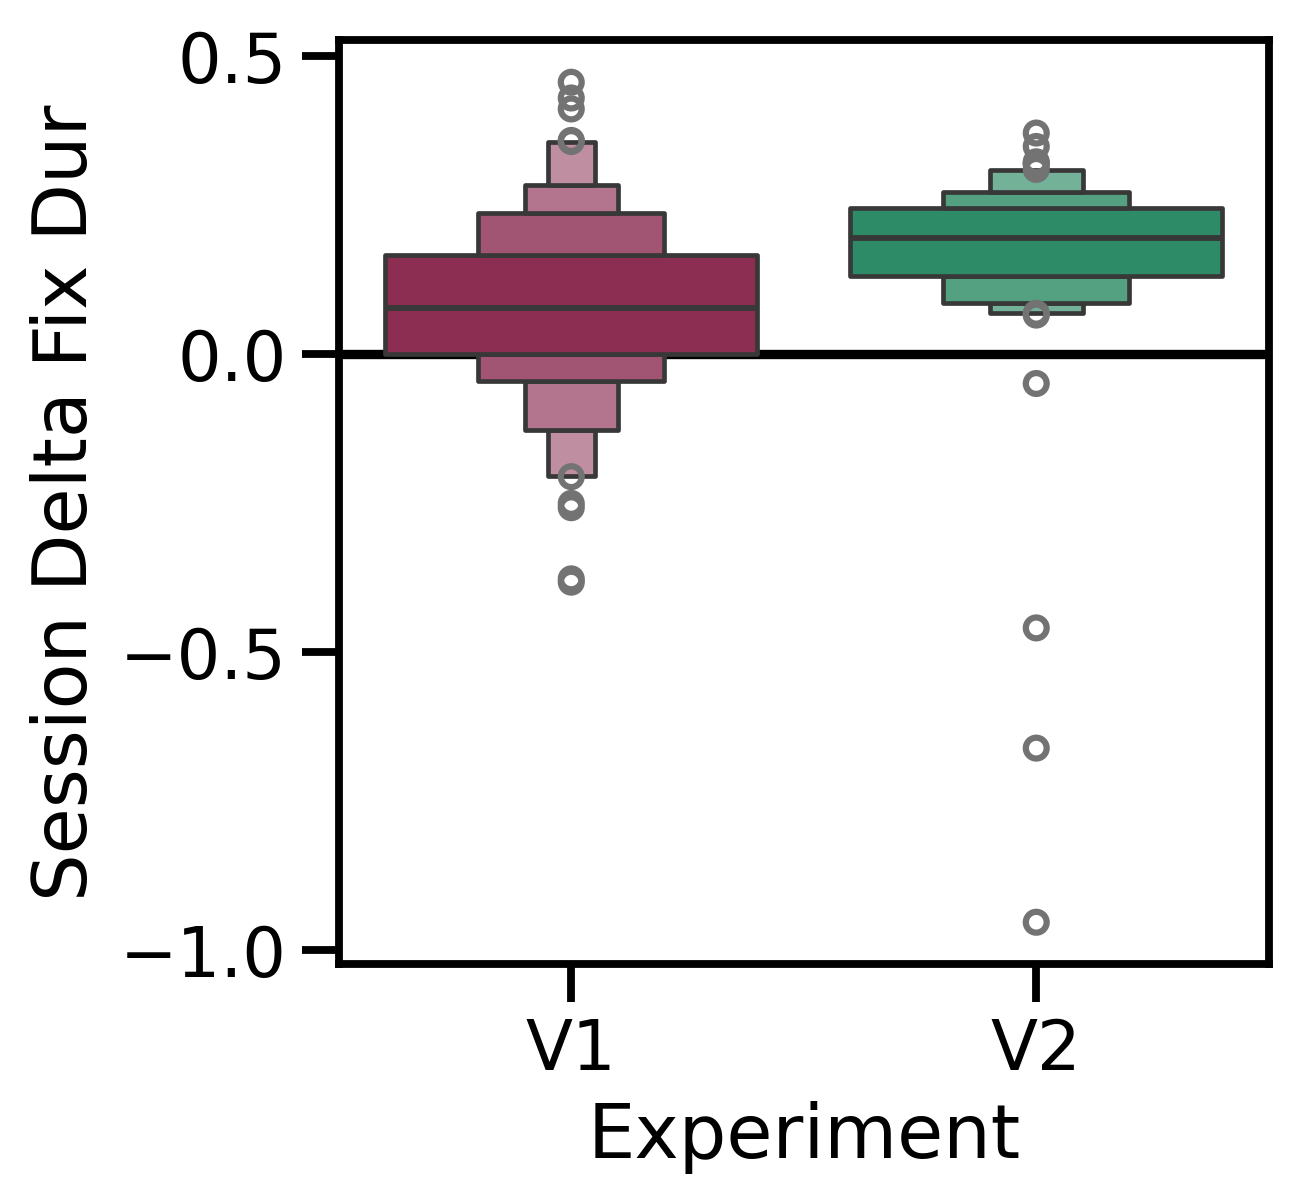

In [101]:
fig, ax = pu.make_fig("s")

# Boxplot
sns.boxenplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
)


ax.axhline(0, color="black", zorder=0)

_ = ax.set(
    ylabel="Session Delta Fix Dur",
    xlabel="Experiment",
)

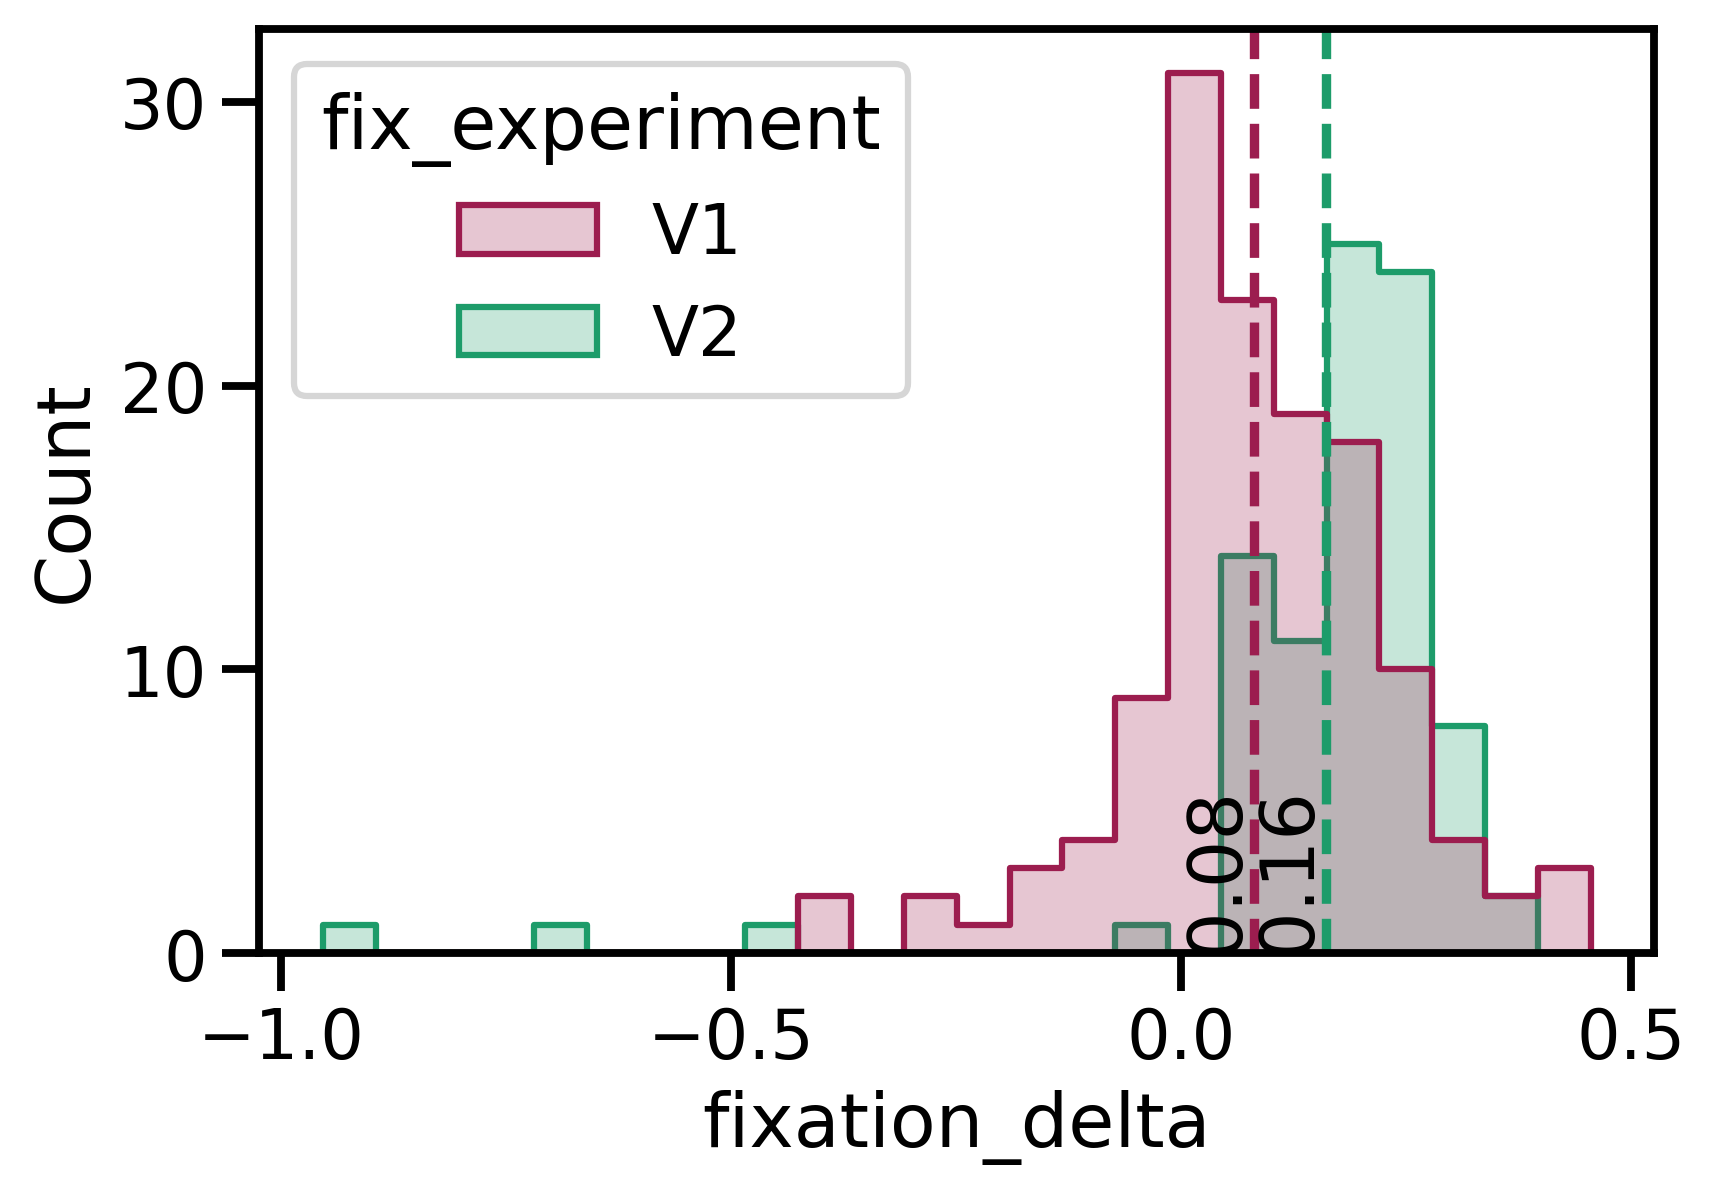

In [102]:
fig, ax = pu.make_fig("m")


sns.histplot(
    data=fix_delta_df,
    x="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    element="step",
)

# mark the mean for each experiment
for ii, (exp, sub_df) in enumerate(fix_delta_df.groupby("fix_experiment")):
    mean = sub_df.fixation_delta.mean()
    ax.axvline(mean, color=pu.ALPHA_PALLETTE[ii], linestyle="--")
    ax.text(
        mean,
        0,
        f"{mean:.2f}",
        rotation=90,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

### 1.1.4 Violation Rate During Warm Up

In [178]:
v1df = tdf.query("fix_experiment == 'V1' and stage <= 7 and animal_id !='R044'").copy()

v1df_viol_warm_up = (
    v1df.groupby(["animal_id", "warm_up_imp"]).violations.mean().reset_index()
)

[Text(0.5, 0, 'Warm Up On'), Text(0, 0.5, 'Violation Rate')]

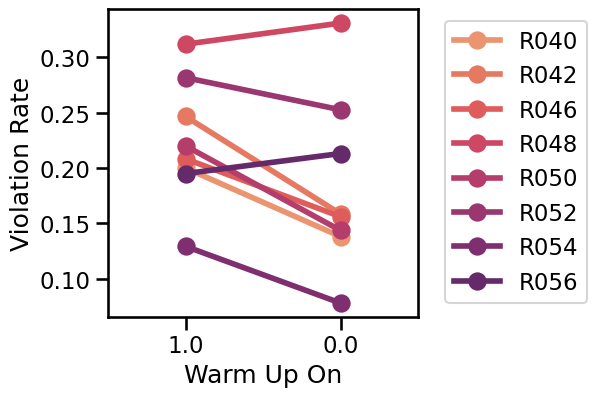

In [179]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.pointplot(
    data=v1df_viol_warm_up,
    x="warm_up_imp",
    order=[1.0, 0.0],
    y="violations",
    hue="animal_id",
    palette=pu.ALPHA_V1_palette,
    ax=ax,
)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set(
    xlabel="Warm Up On",
    ylabel="Violation Rate",
)

In [180]:
v1df_viol_warm_up_wide = v1df_viol_warm_up.pivot(
    index="animal_id", columns="warm_up_imp", values="violations"
)
v1df_viol_warm_up_wide.columns = ["violations_warm_up_off", "violations_warm_up_on"]

v1df_viol_warm_up_wide.reset_index(inplace=True)
v1df_viol_warm_up_wide

animal_id  violations_warm_up_off  violations_warm_up_on
0      R040                0.138127                    0.2
1      R042                0.158538               0.246575
2      R046                0.156074               0.208333
3      R048                0.330829               0.311765
4      R050                0.143639                   0.22
5      R052                0.252564               0.281579
6      R054                 0.07809                0.12931
7      R056                0.213101               0.194986

In [181]:
avg_fix_delta = (
    fix_delta_df.query("fix_experiment == 'V1'")
    .groupby("animal_id")
    .fixation_delta.mean()
    .reset_index()
)

v1_fix_viol_warm_up = pd.merge(avg_fix_delta, v1df_viol_warm_up_wide, on="animal_id")
v1_fix_viol_warm_up.head()

animal_id  fixation_delta  violations_warm_up_off  violations_warm_up_on
0      R040        0.159922                0.138127                    0.2
1      R042        0.181157                0.158538               0.246575
2      R046        0.152683                0.156074               0.208333
3      R048        0.011751                0.330829               0.311765
4      R050        0.107425                0.143639                   0.22

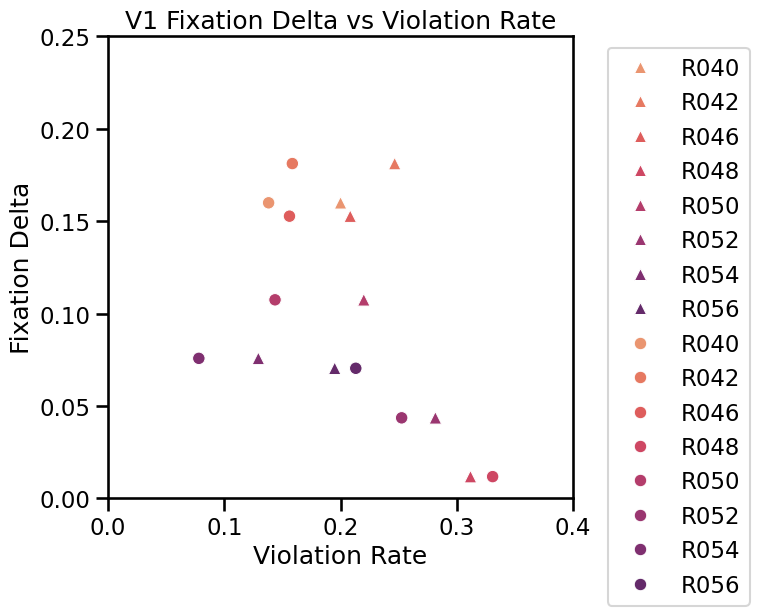

In [184]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    x="violations_warm_up_on",
    y="fixation_delta",
    data=v1_fix_viol_warm_up,
    hue="animal_id",
    palette=pu.ALPHA_V1_palette,
    # label="In Warm Up",
    ax=ax,
    marker="^",
)
sns.scatterplot(
    x="violations_warm_up_off",
    y="fixation_delta",
    data=v1_fix_viol_warm_up,
    hue="animal_id",
    palette=pu.ALPHA_V1_palette,
    ax=ax,
    # label="Not in Warm Up",
    marker="o",
)

ax.set(
    xlabel="Violation Rate",
    ylabel="Fixation Delta",
    title="V1 Fixation Delta vs Violation Rate",
    xlim=(0, 0.4),
    ylim=(0, 0.25),
)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# 2. Robustness

## 2.1 Stage Progression

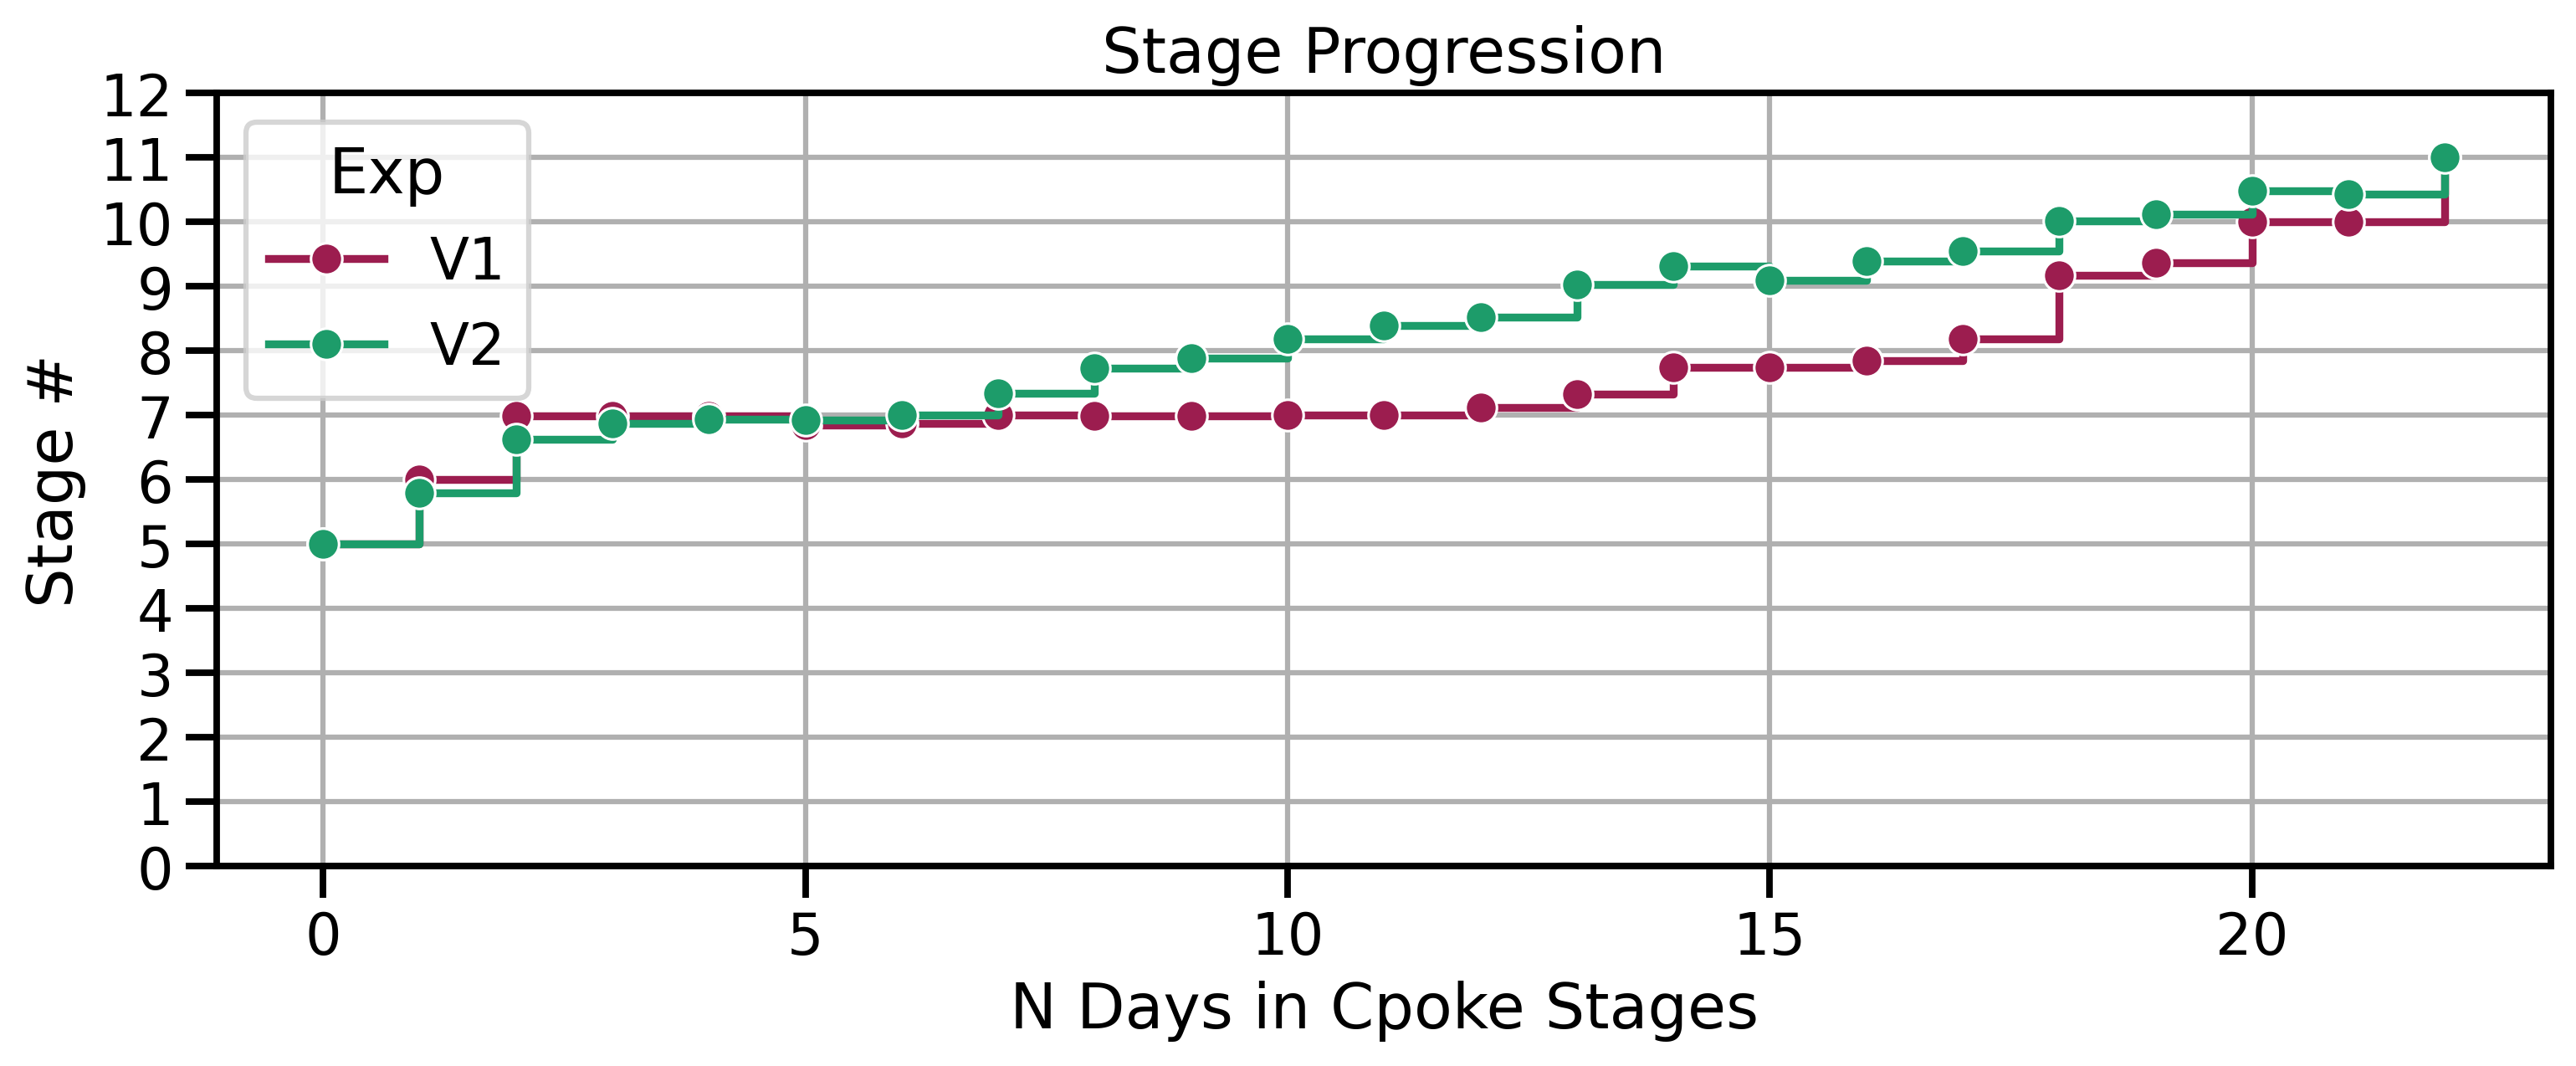

In [189]:
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiments(
    tdf.query("stage >=5").copy(),
    ax=ax,
    rotate_x_labels=False,
    relative_to_stage=5,
    plot_individuals=False,
    ylim=(0, 12),
    title="Stage Progression",
)
ax.set(xlabel="N Days in Cpoke Stages", title="Stage Progression")
ax.legend(title="Exp")

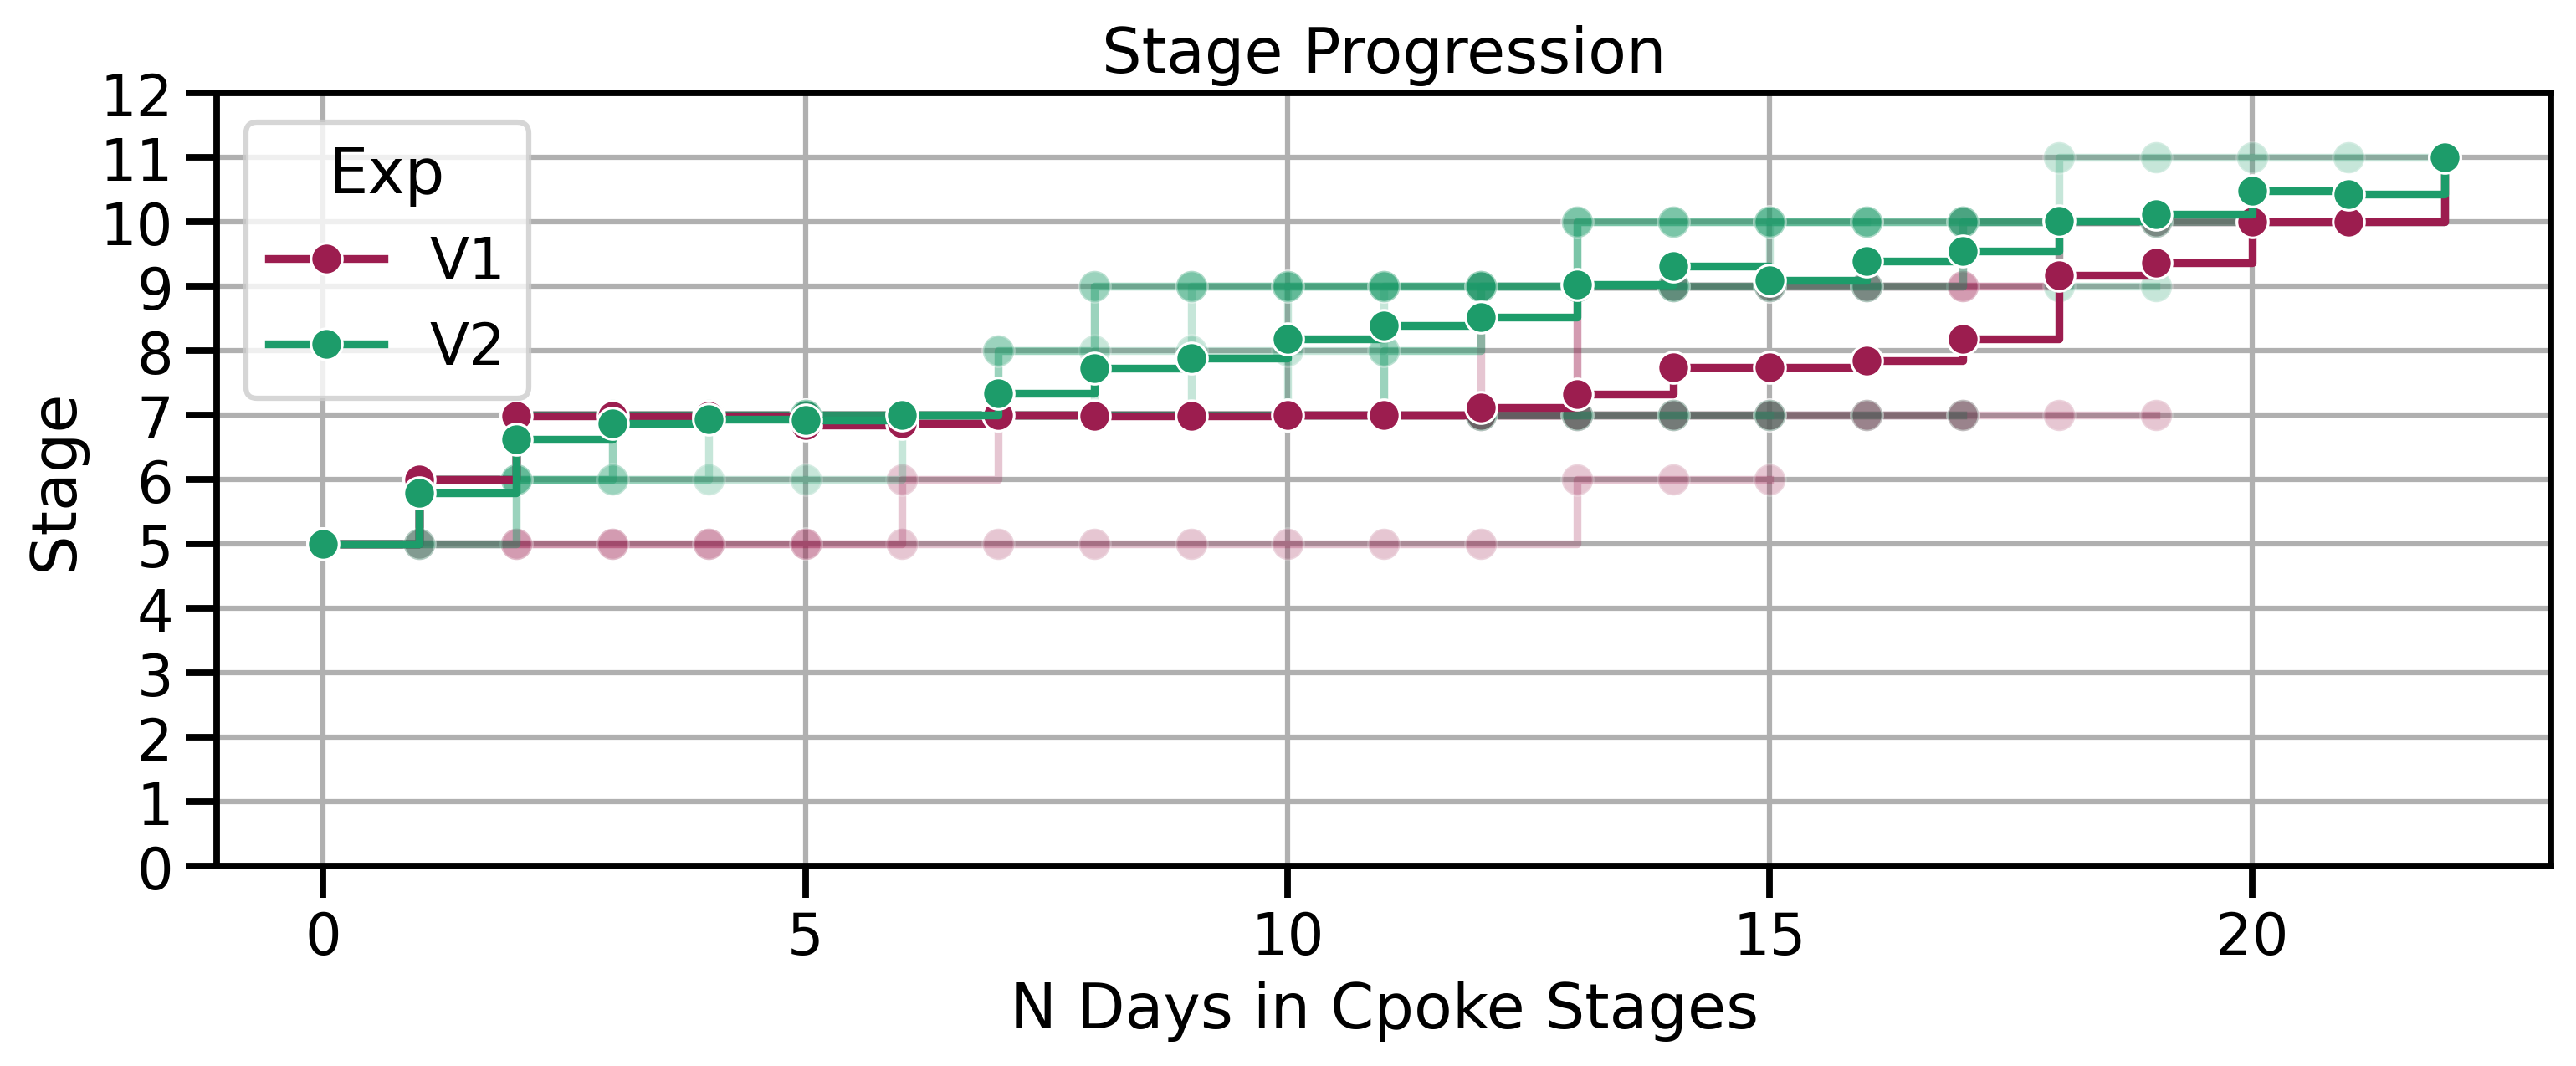

In [192]:
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiments(
    tdf.query("stage >=5 ").copy(),
    ax=ax,
    rotate_x_labels=False,
    relative_to_stage=5,
    plot_individuals=True,
    ylim=(0, 12),
    title="Stage Progression",
)
ax.set(xlabel="N Days in Cpoke Stages")
ax.legend(title="Exp")

### 2.1.1 Days in Stage 5

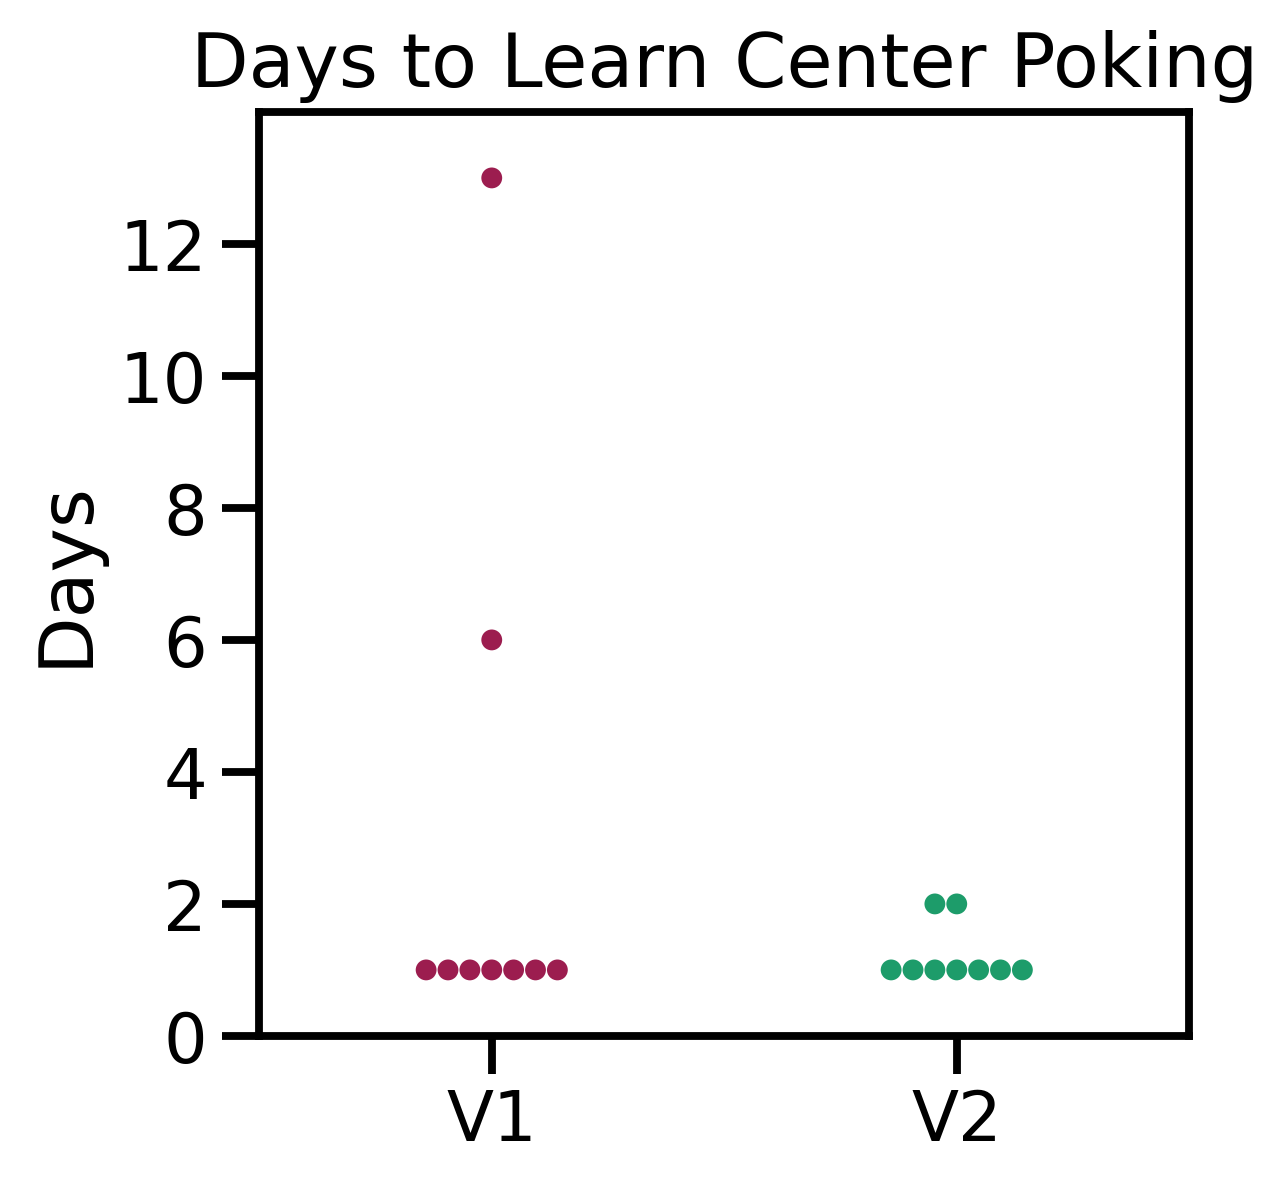

In [204]:
fig, ax = pu.make_fig((4, 4))
stage_5_df = viz.df_preperation.make_days_in_stage_df(
    tdf,
    min_stage=5,
    max_stage=5,
)
sns.swarmplot(
    data=stage_5_df,
    x="fix_experiment",
    y="n_days",
    ax=ax,
    palette=pu.ALPHA_PALLETTE,
    hue="fix_experiment",
    order=["V1", "V2"],
)

_ = ax.set_yticks(range(0, 14, 2))
_ = ax.set(ylabel="Days", xlabel="", title="Days to Learn Center Poking", ylim=(0, 14))

# 3. Fixation Growth

## 3.1 Overall Growth

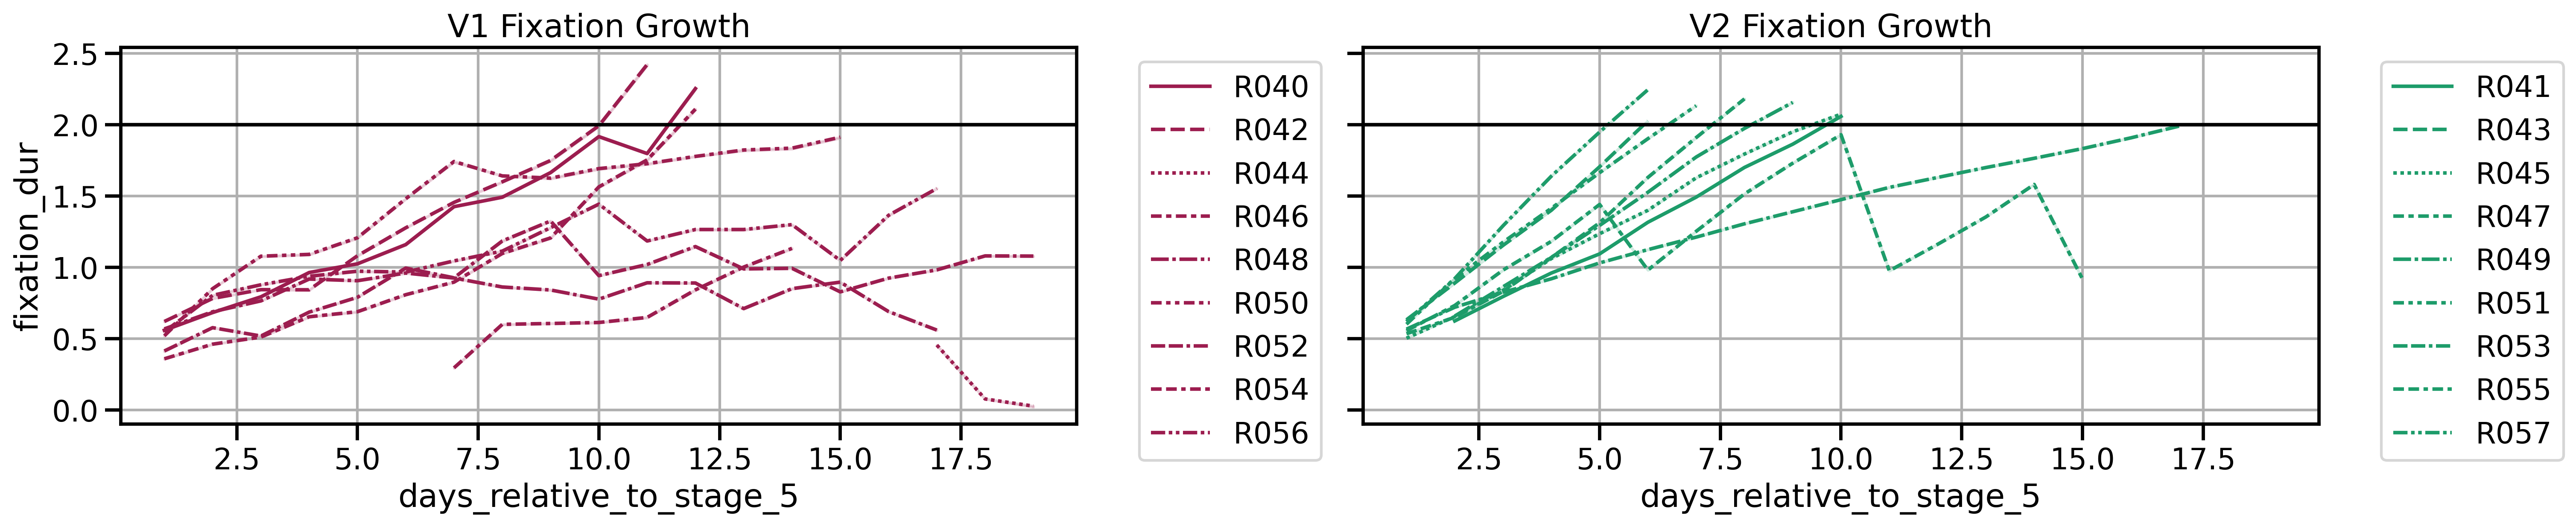

In [205]:
fig, ax = plt.subplots(
    1, 2, figsize=(20, 4), sharey=True, sharex=True, constrained_layout=True, dpi=300
)
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df.query("stage > 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax[ii],
        lw=2,
    )
    ax[ii].grid()
    ax[ii].set_title(f"{exp} Fixation Growth")
    ax[ii].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[ii].axhline(2, color="k", lw=2)

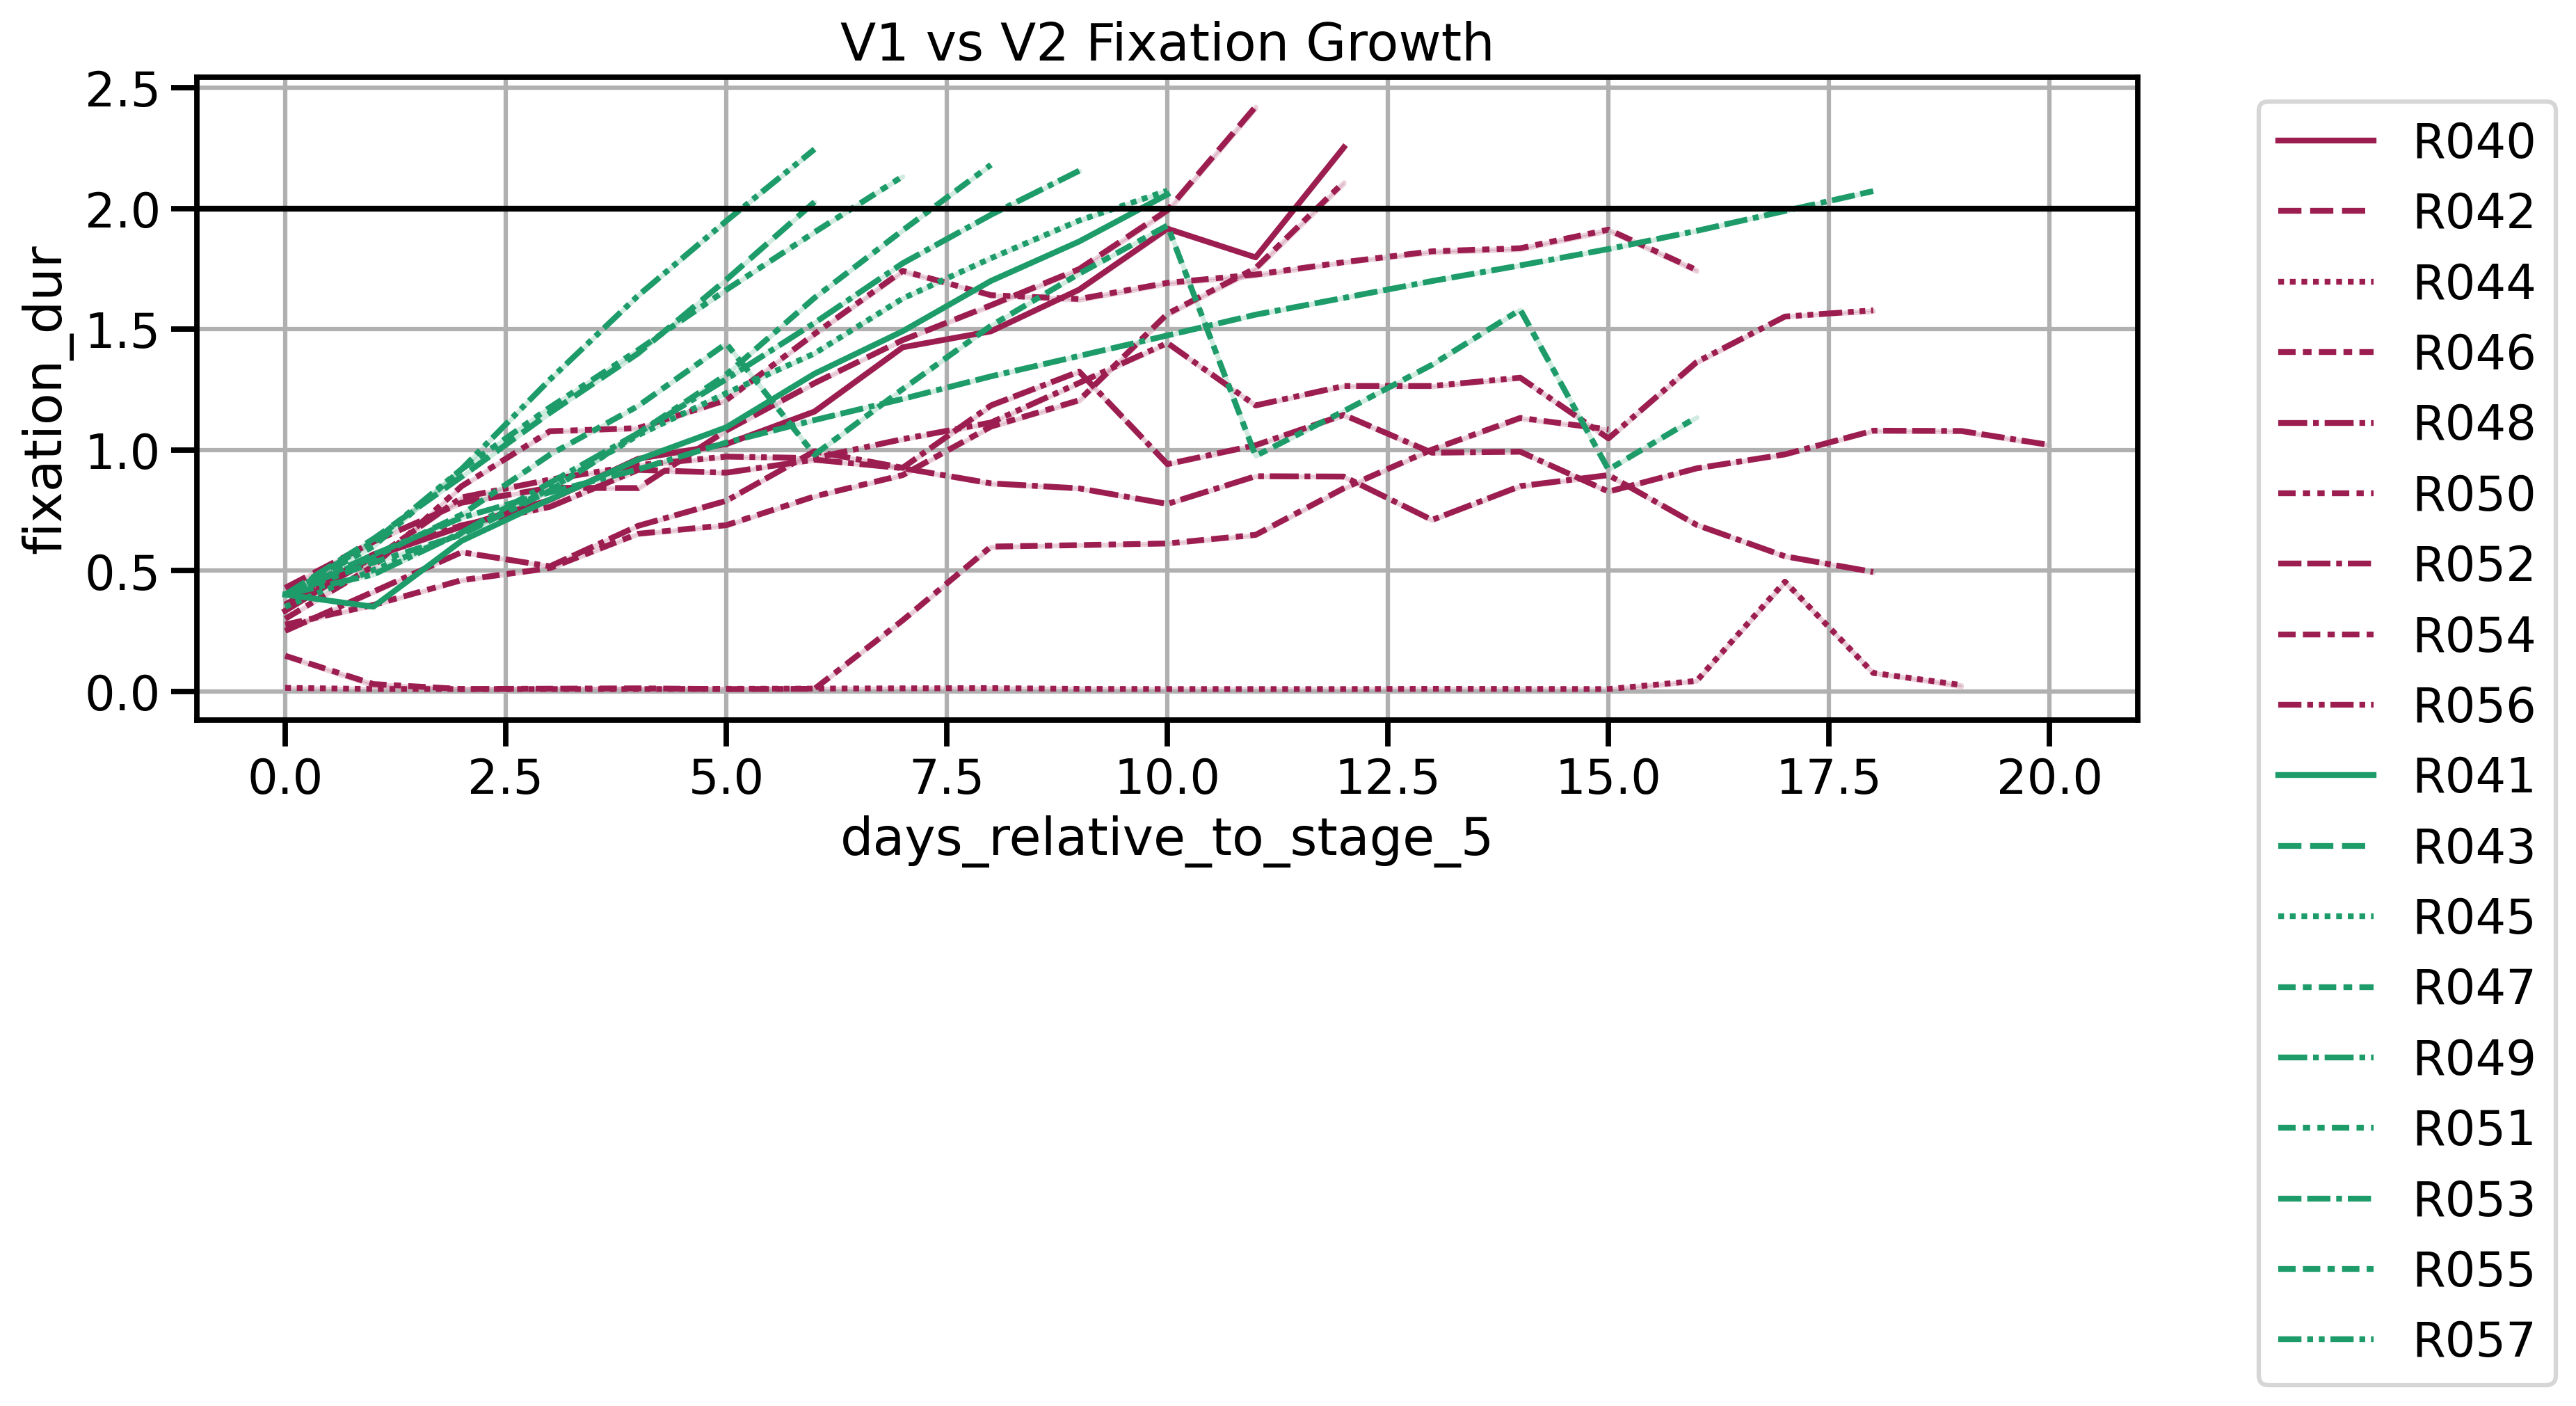

In [237]:
fig, ax = pu.make_fig()
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df.query("stage >= 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
    )
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Growth")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(2, color="k", lw=2)

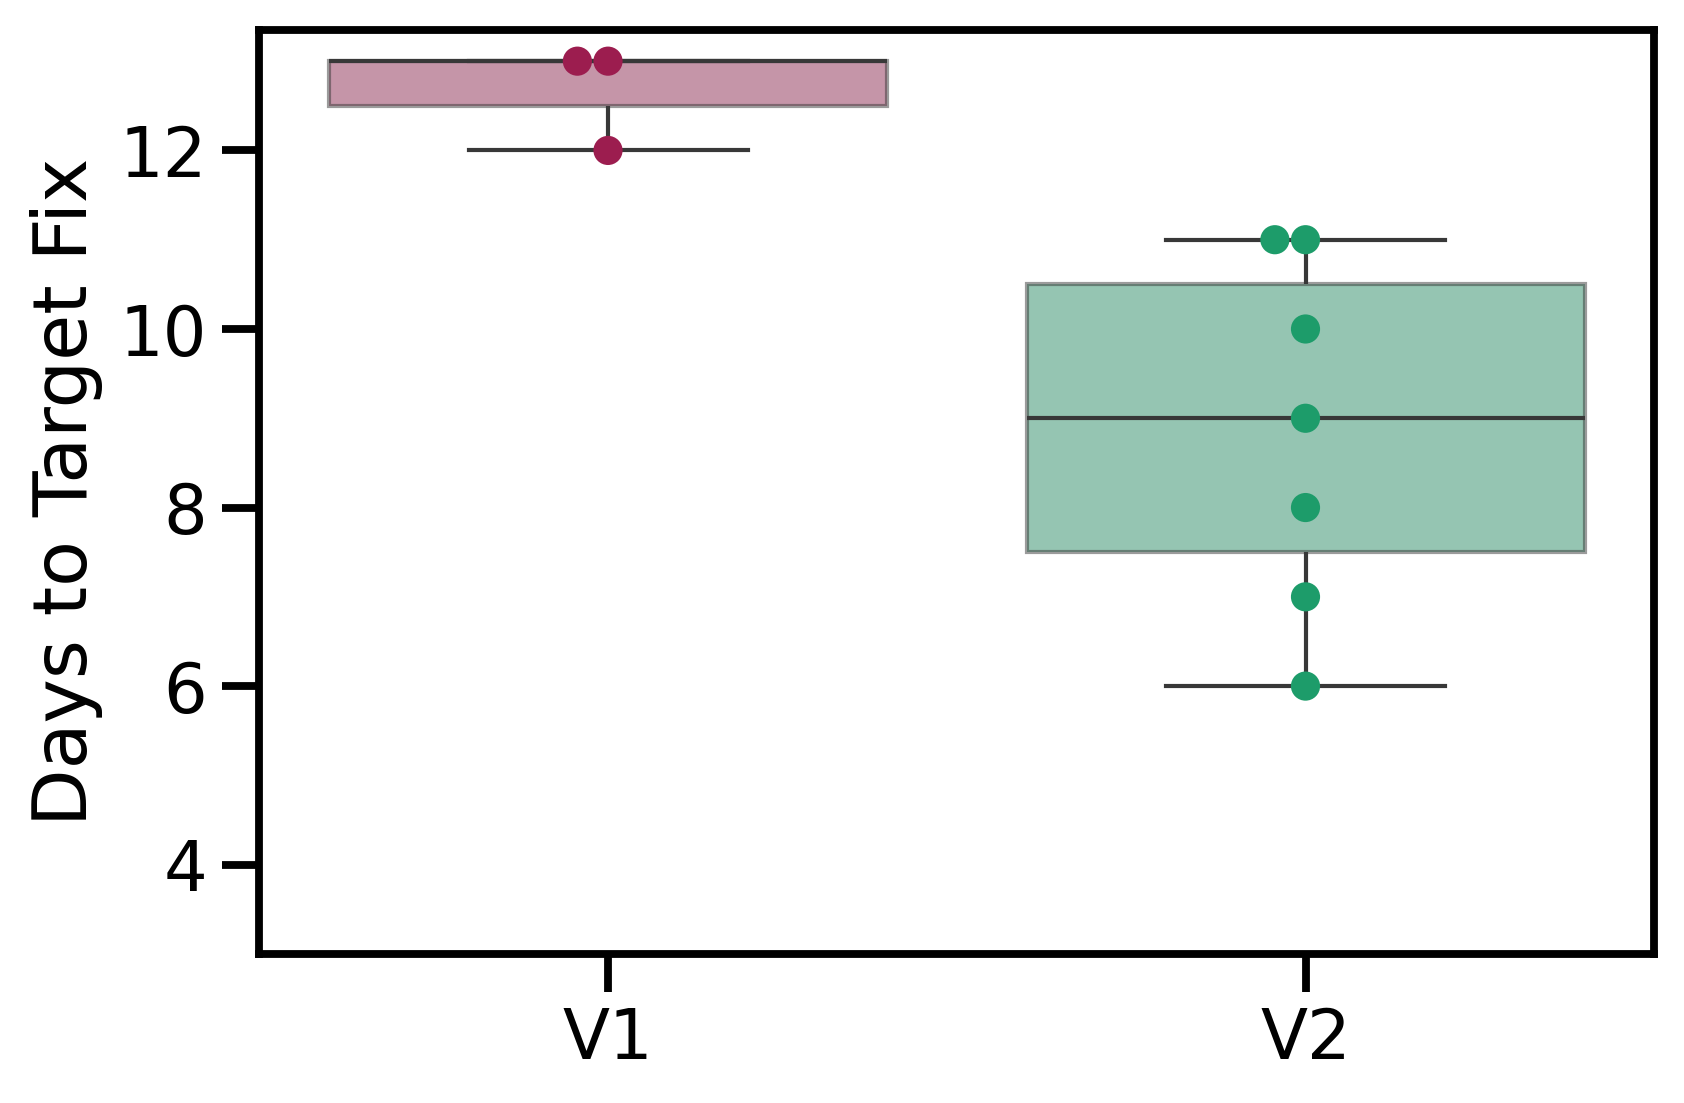

In [297]:
viz.FixationGrower.exp_compare_alpha.plot_days_to_reach_target_fix_boxplot_compare_experiment(
    tdf
)

## 3.2 Problem Animals

### 3.2.1 Fixation Dur Over Days

In [251]:
date = pd.Timestamp(2024, 8, 22).date()
still_growing = (
    tdf.query("date == @date and stage < 8 and animal_id != 'R053'")
    .animal_id.unique()
    .tolist()  # R053 finished growing today
)
growing_animals_df = tdf.query("animal_id == @still_growing").copy()

(-0.08597609477124196, 2.25)

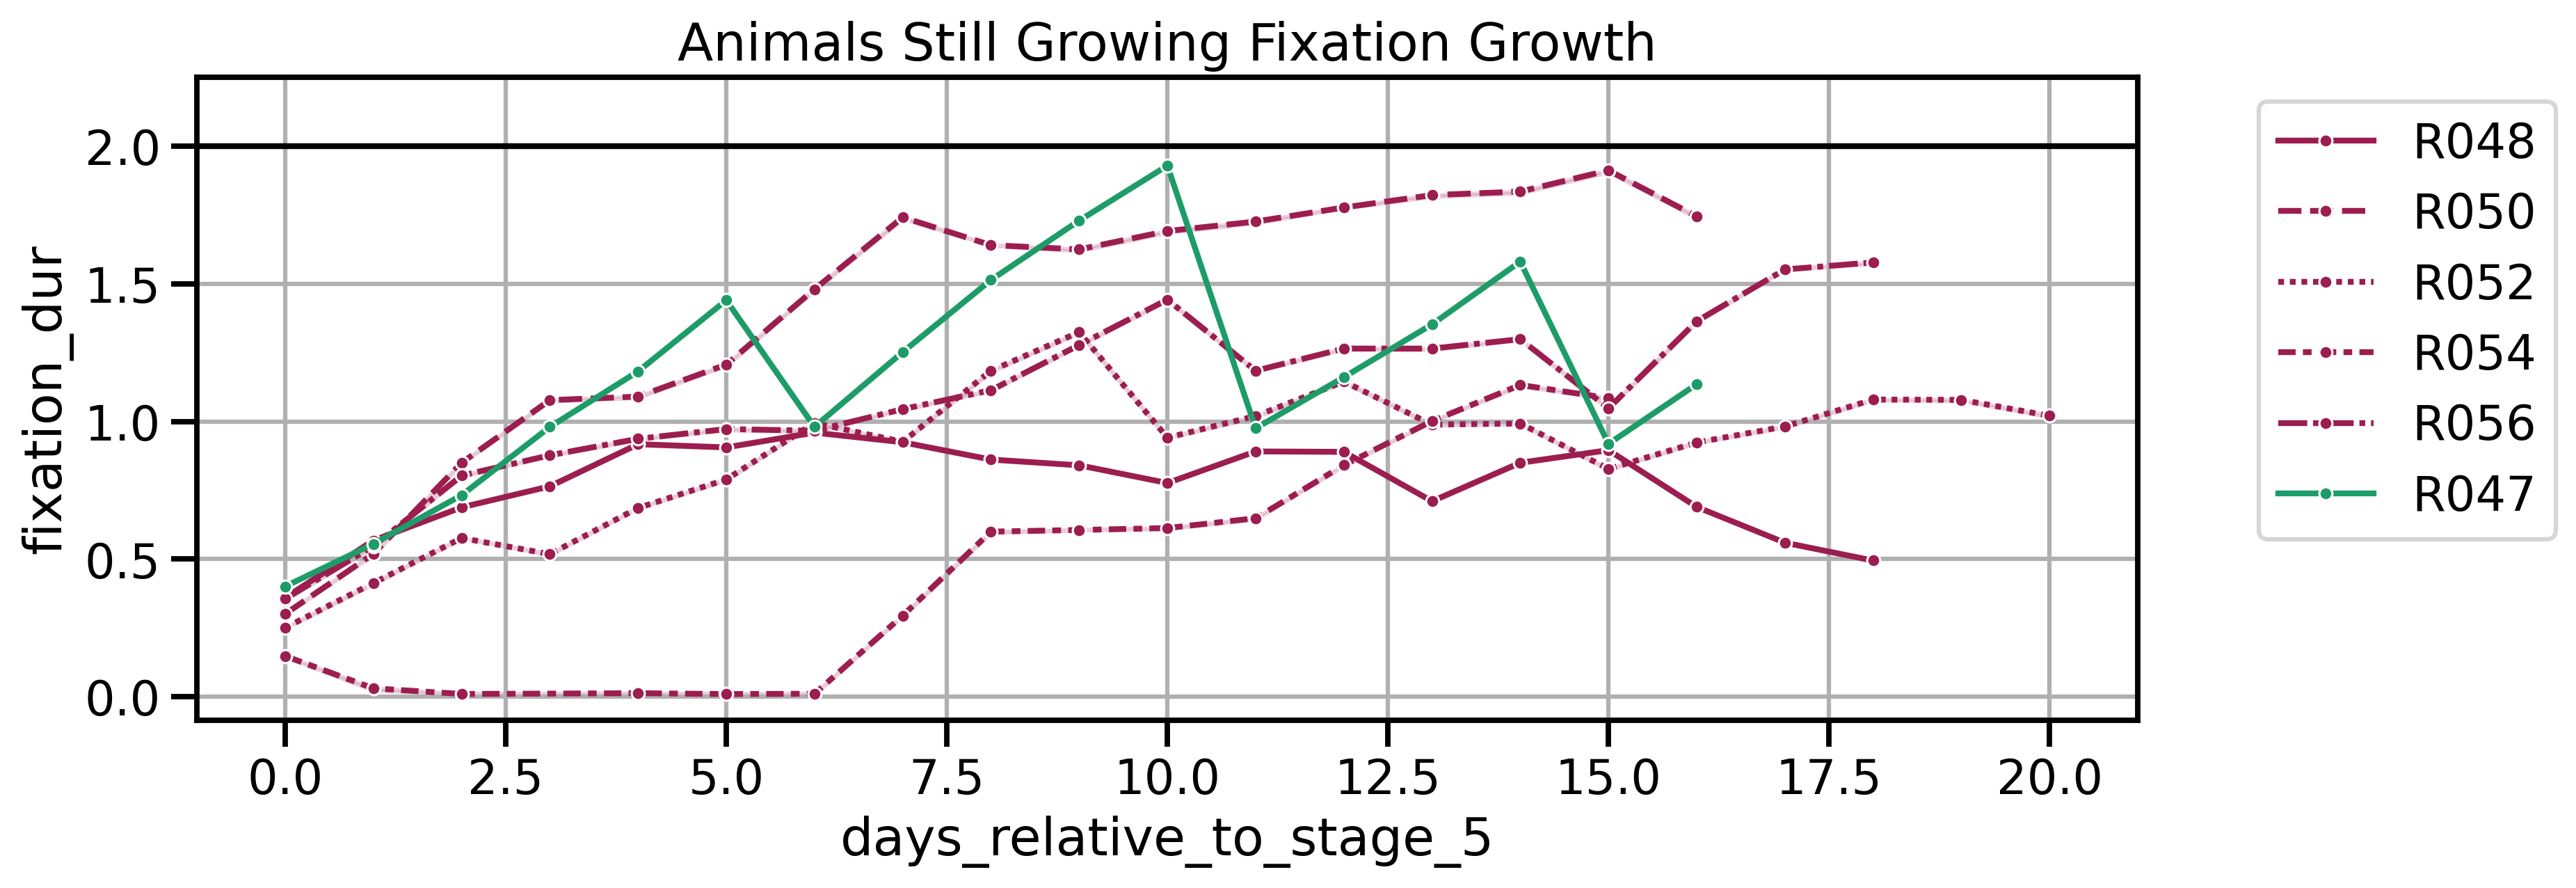

In [257]:
fig, ax = pu.make_fig()
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(growing_animals_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df.query("stage >= 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
        marker=".",
    )
ax.grid()
ax.set_title(f"Animals Still Growing Fixation Growth")
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
ax.axhline(2, color="k", lw=2)
ax.set_ylim(None, 2.25)

(-0.08597609477124196, 2.25)

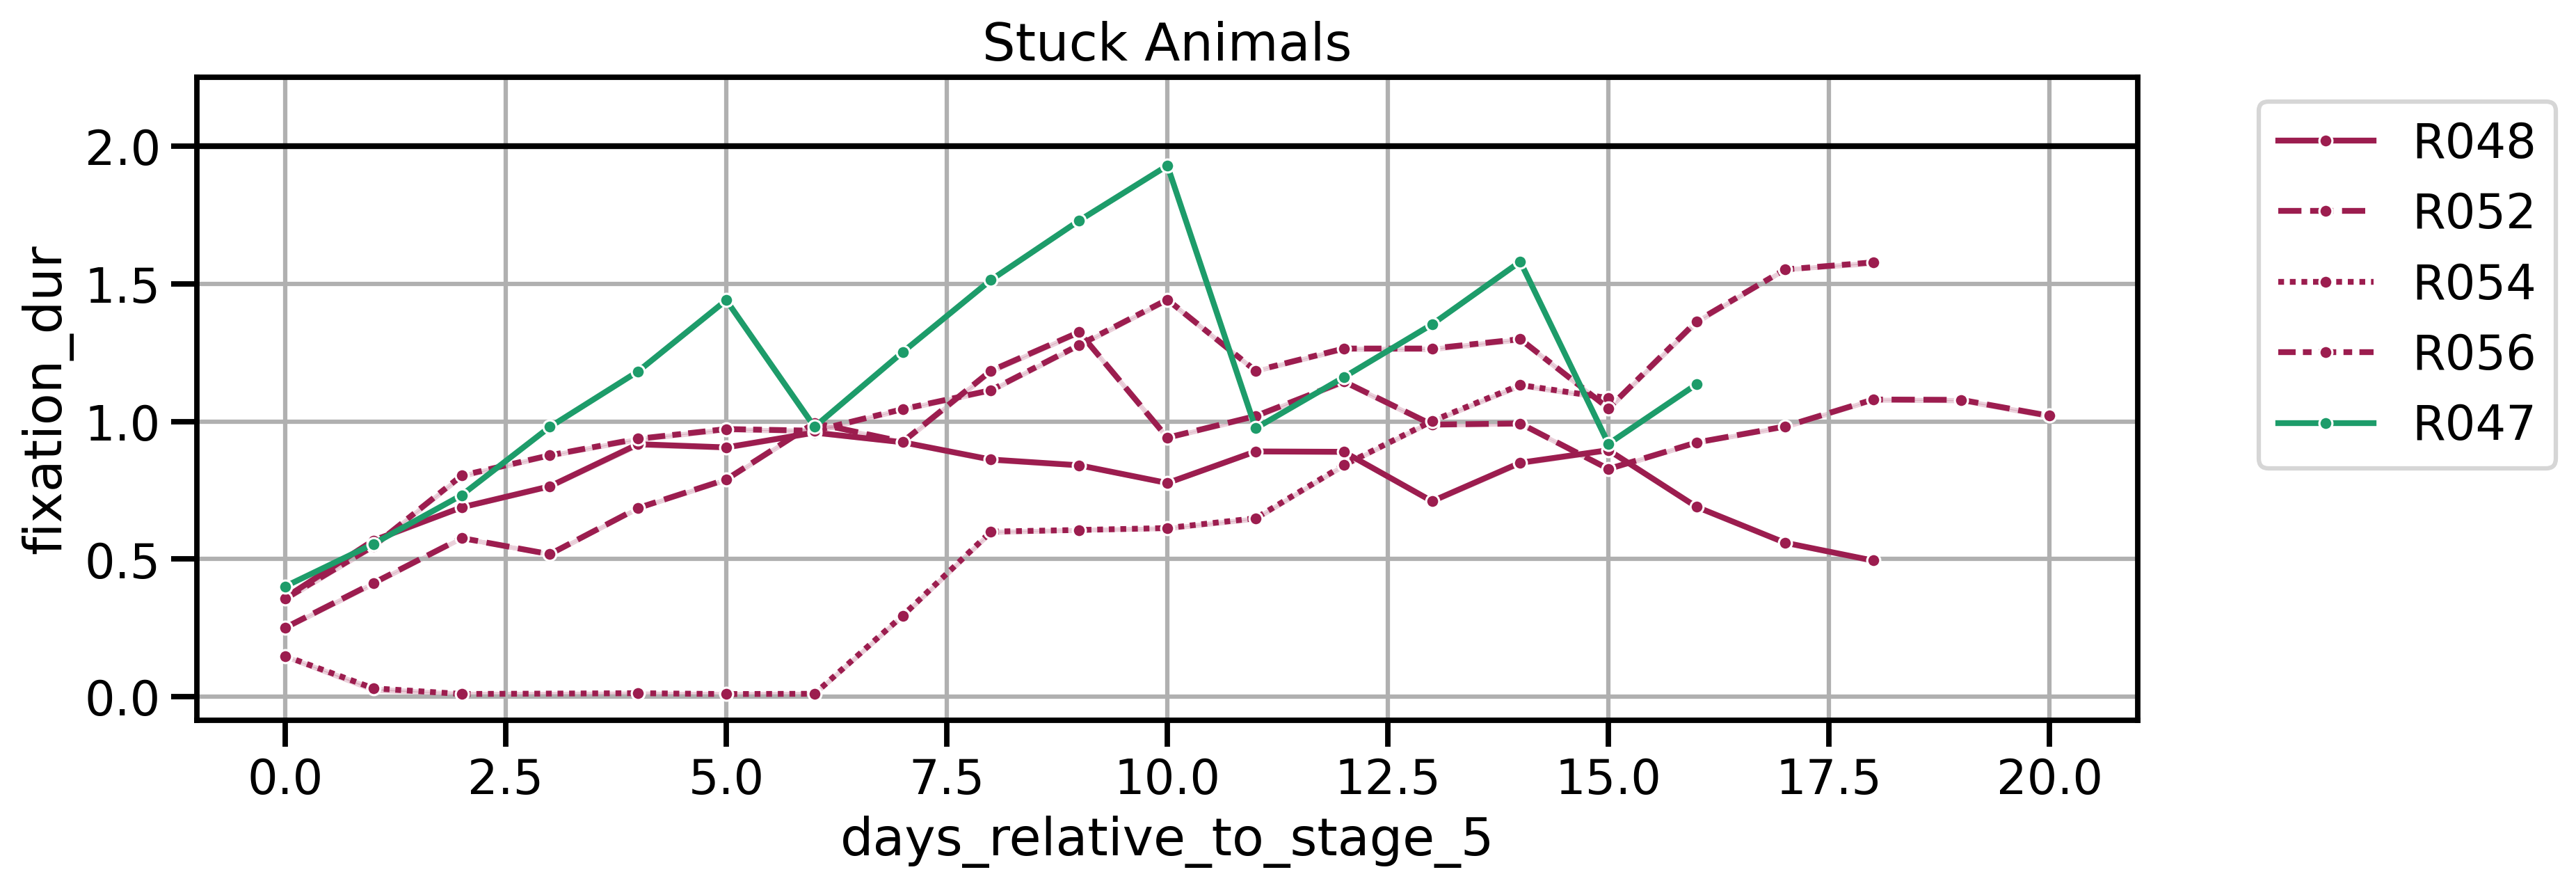

In [259]:
problem_animals = ["R047", "R048", "R052", "R054", "R056"]
fig, ax = pu.make_fig()
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(
    growing_animals_df.query("animal_id in @problem_animals").groupby("fix_experiment")
):

    sns.lineplot(
        data=sub_df.query("stage >= 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
        marker=".",
    )
ax.grid()
ax.set_title(f"Stuck Animals")
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
ax.axhline(2, color="k", lw=2)
ax.set_ylim(None, 2.25)

R050 is so close- might be worth letting them make it on their own

### 3.2.2 Delta Fixation Dur Over Days

In [260]:
fix_delta_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(
    growing_animals_df.query("animal_id in @problem_animals and stage < 8").copy()
)

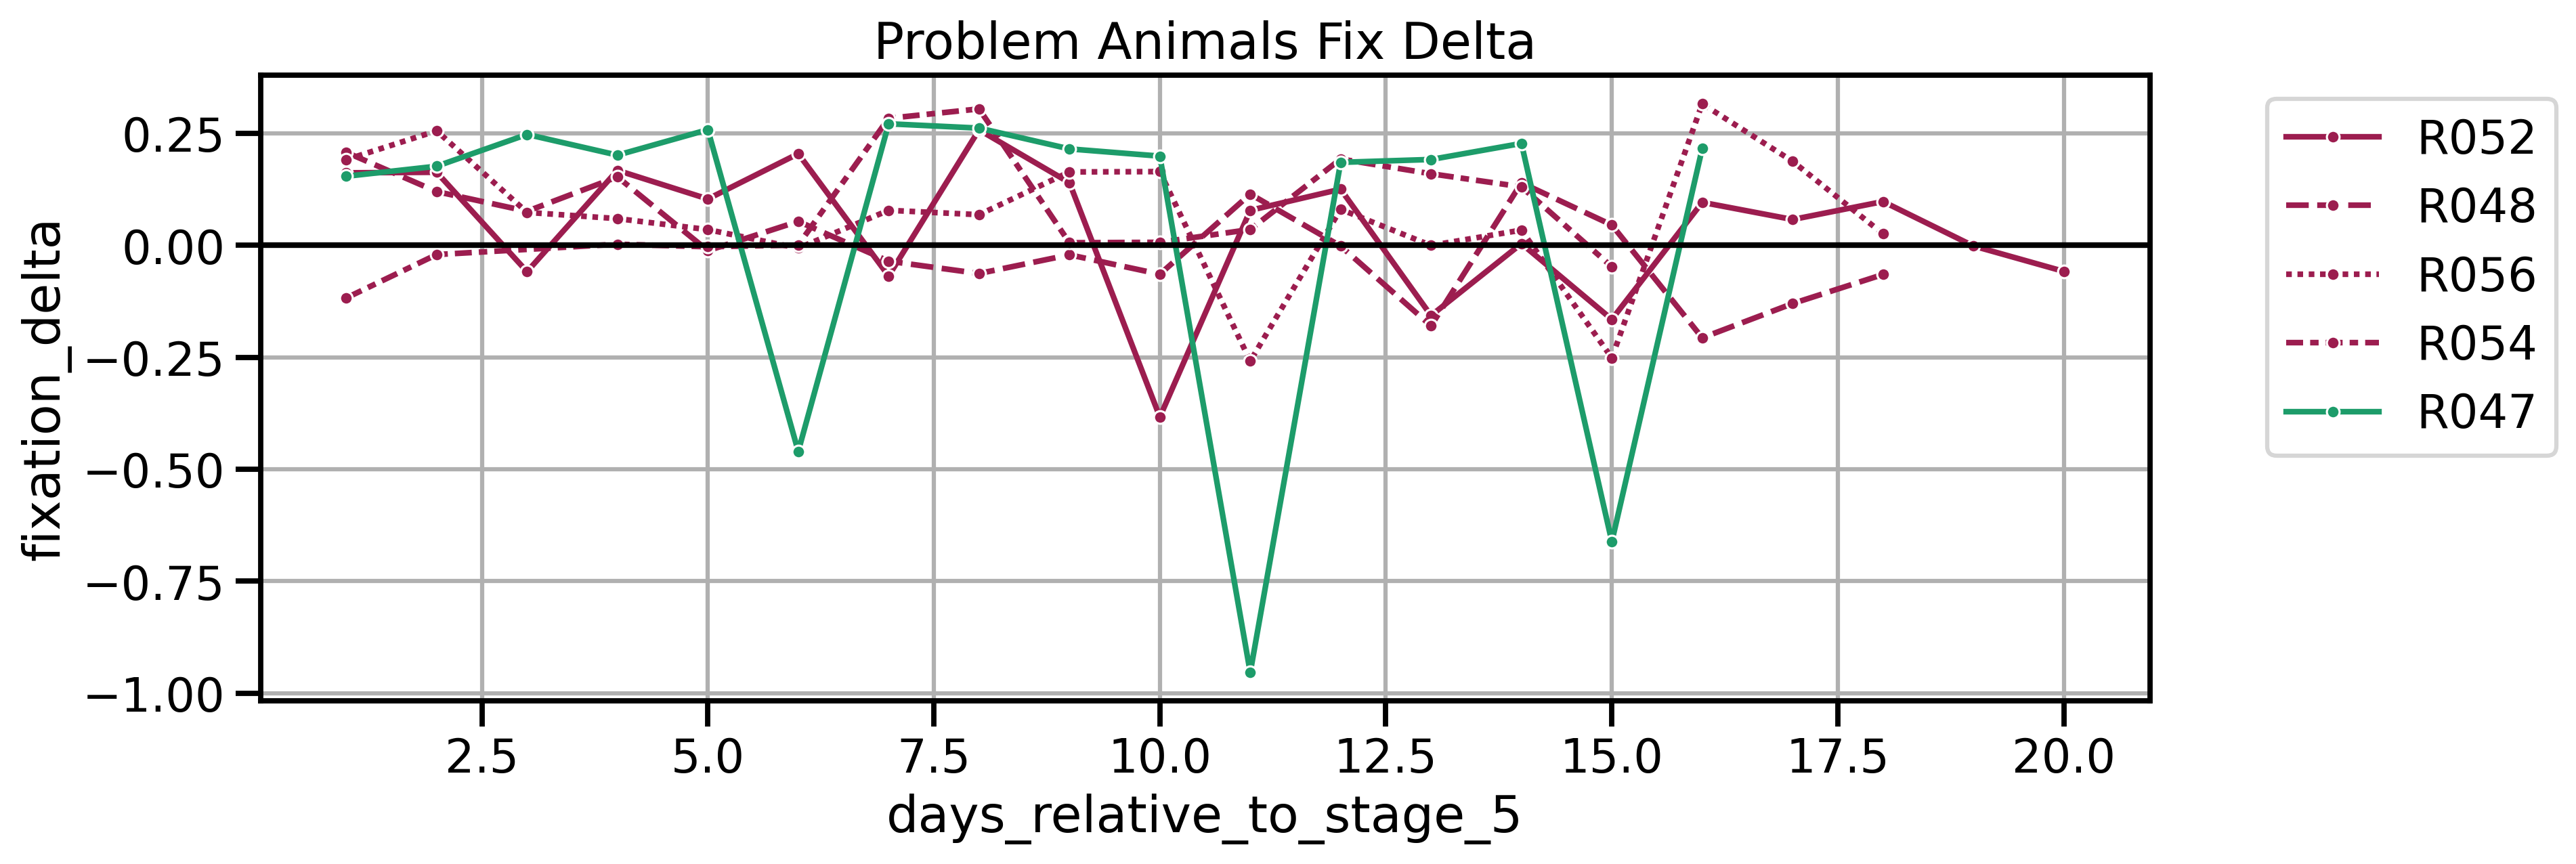

In [261]:
fig, ax = pu.make_fig()
for ii, (exp, sub_df) in enumerate(fix_delta_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_delta",
        style="animal_id",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
        marker=".",
    )
ax.grid()
ax.set_title(f"Problem Animals Fix Delta")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(0, color="k", lw=2)

In [291]:
def plot_prev_avg_fixation_growth(fix_delta_df, num_days_back=7, ax=None):
    """
    Plots the mean fixation delta for the previous week (or specified number of days) per animal ID.

    Parameters:
    - fix_delta_df: DataFrame containing columns 'animal_id', 'fix_experiment', and 'fixation_delta'
    - num_days_back: Number of days to calculate the mean fixation delta for (default is 7)
    - ax: Optional Matplotlib axis object to plot on (default is None, creates new figure)
    """

    # Group by animal_id and fix_experiment, compute mean fixation delta for the last num_days_back days
    col_name = f"prev_{num_days_back}_days_delta"
    fix_delta_summary = (
        fix_delta_df.groupby(["animal_id", "fix_experiment"])[fix_delta_df.columns]
        .apply(lambda x: x.fixation_delta[-num_days_back:].mean())
        .reset_index(name=col_name)
    )

    # If no axis is provided, create one
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 4), dpi=300)

    # Create the bar chart
    sns.barplot(
        data=fix_delta_summary,
        x="animal_id",
        y=col_name,
        hue="fix_experiment",
        palette=pu.ALPHA_PALLETTE,
        hue_order=["V1", "V2"],
        ax=ax,
    )

    # Add labels and formatting
    ax.set_xlabel("Animal ID")
    ax.set_ylabel("Mean Fixation Delta [s]")
    ax.set_title(f"Prev {num_days_back} Days Fixation Growth")
    ax.axhline(0, color="black", lw=2)
    ax.set_ylim(-0.1, 0.2)

    # Remove top and right spines
    sns.despine(ax=ax)

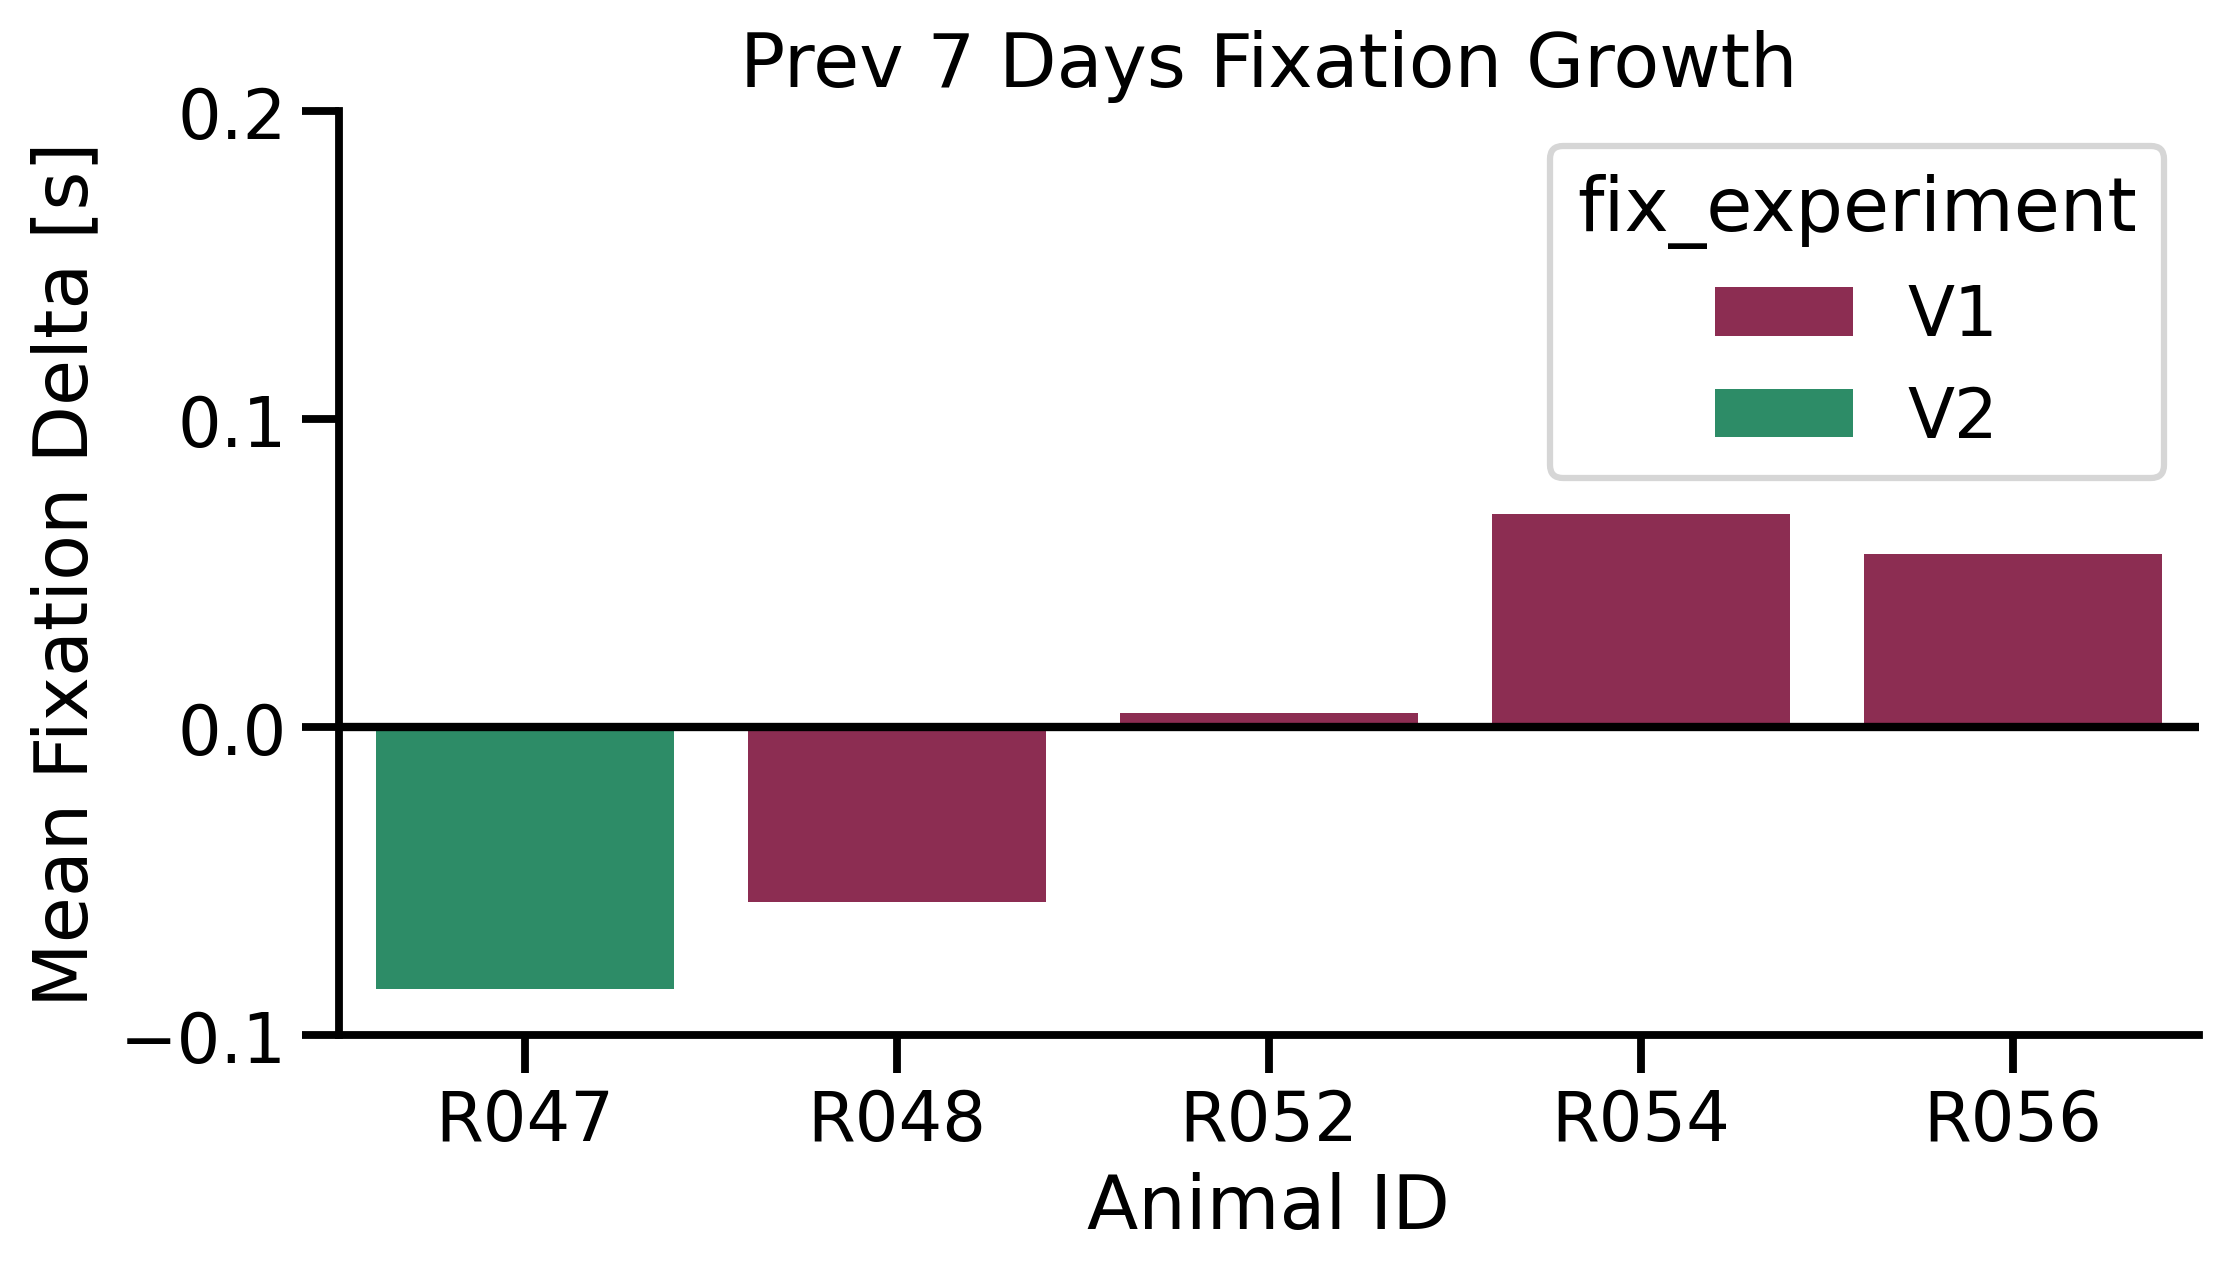

In [296]:
plot_prev_avg_fixation_growth(fix_delta_df, num_days_back=7)

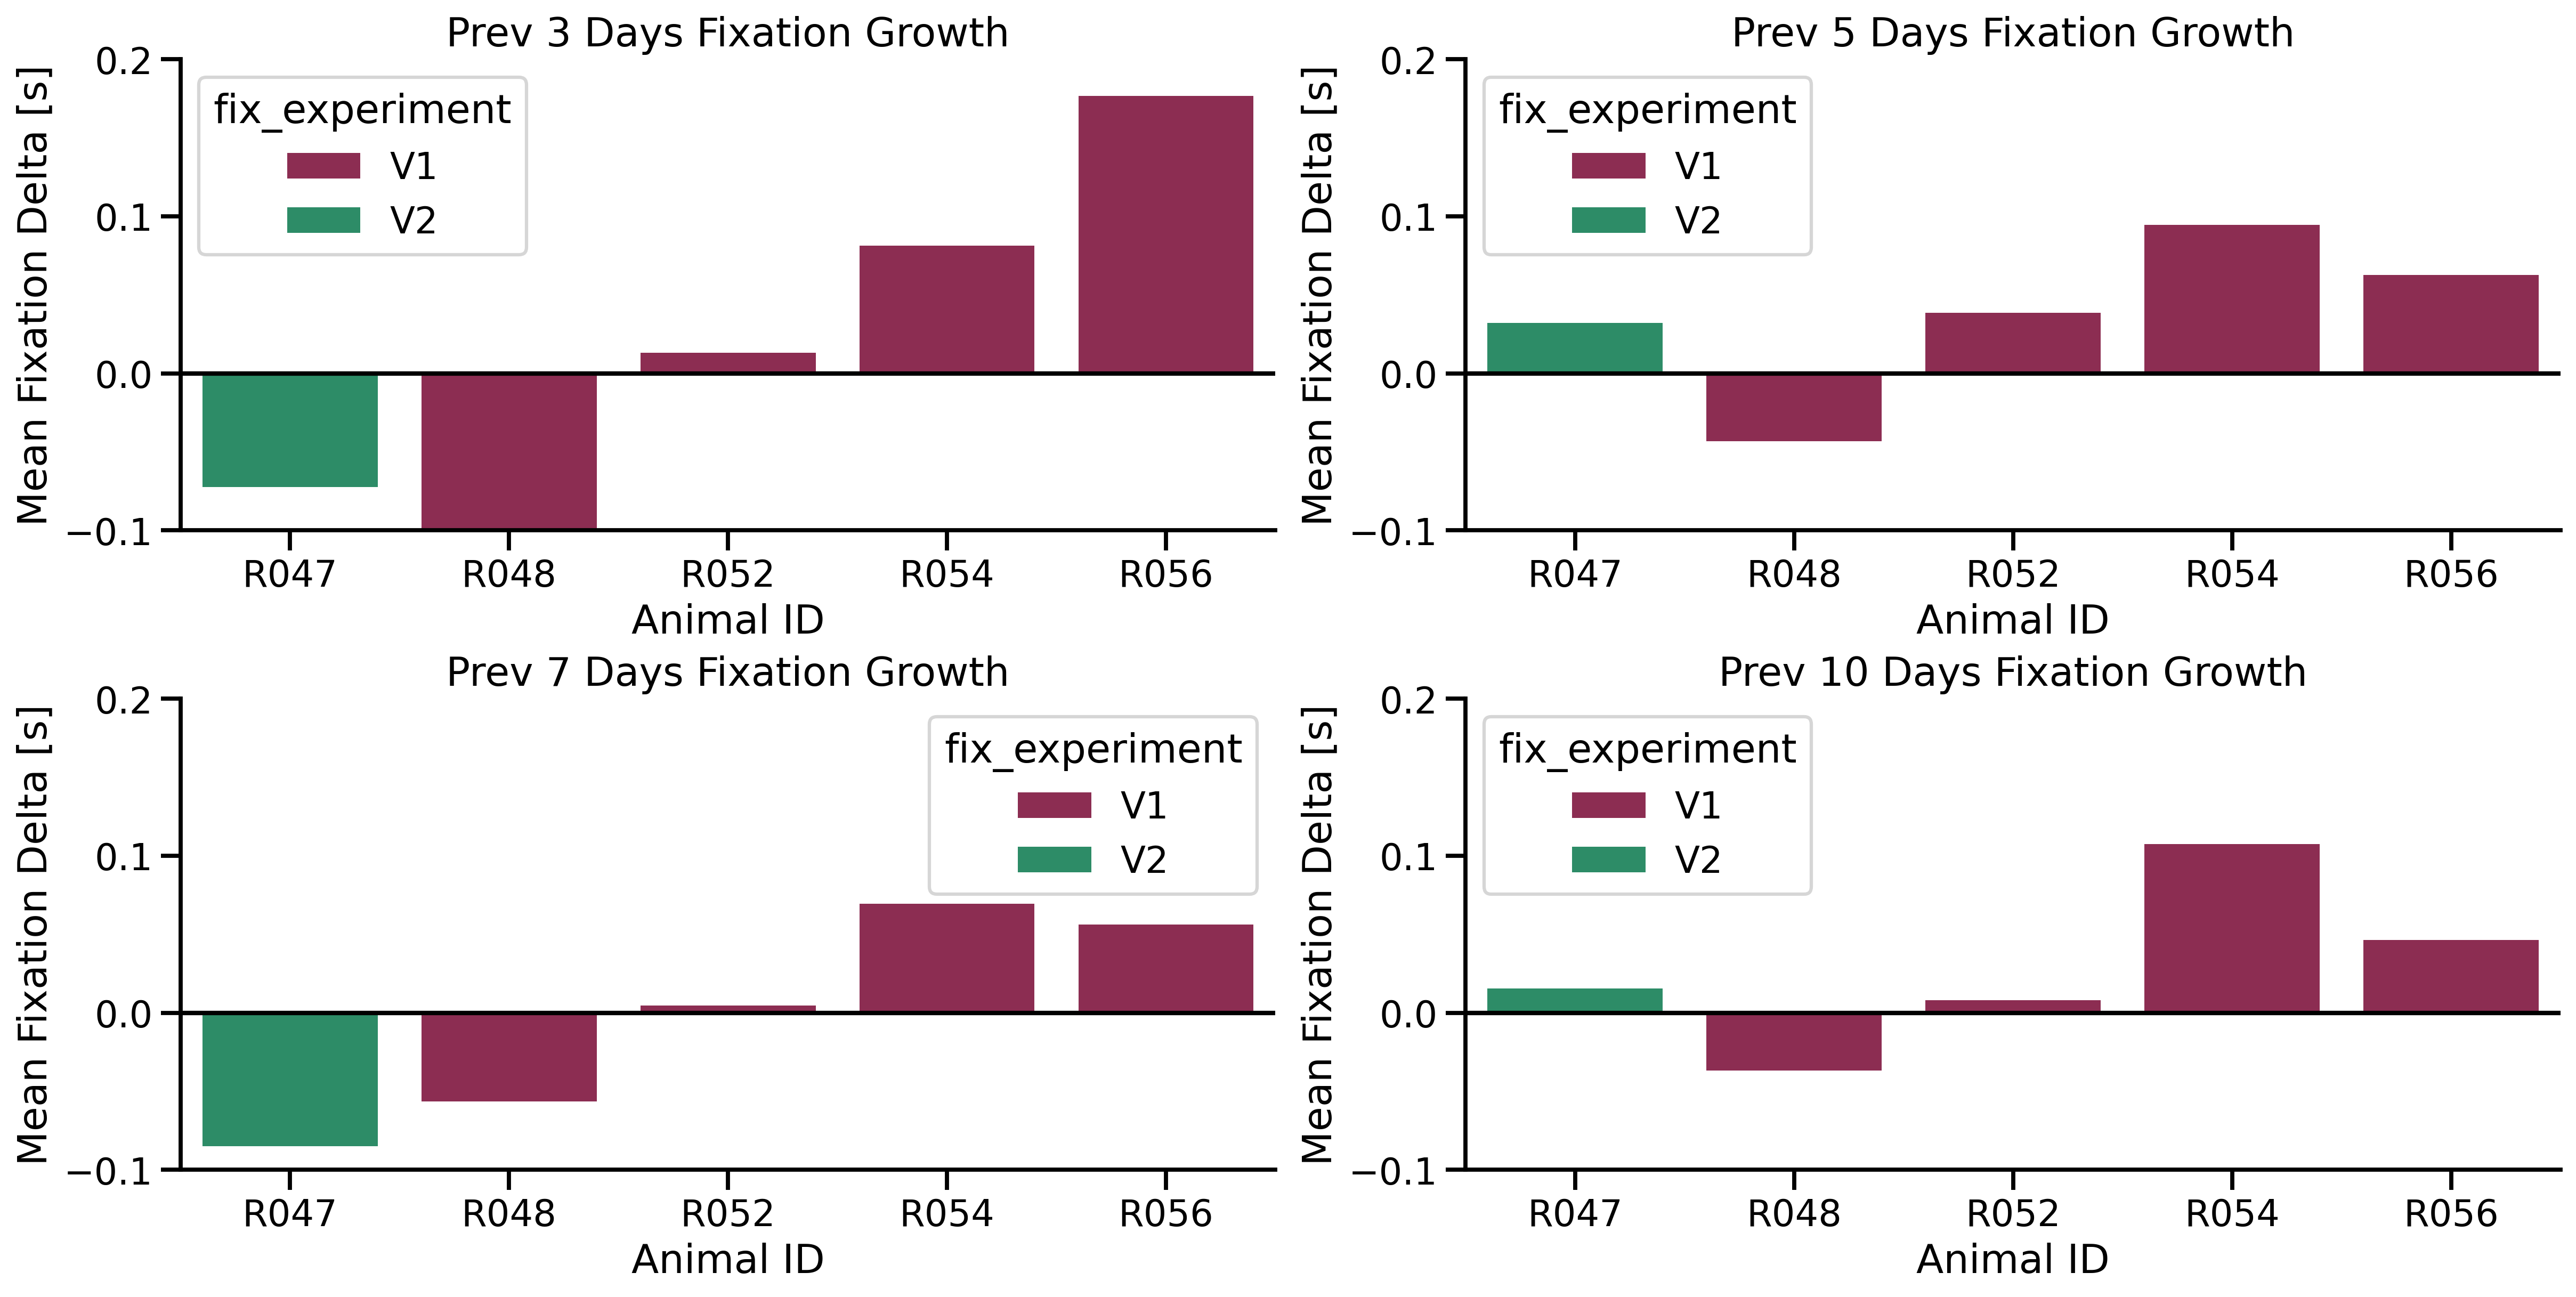

In [295]:
days_back = [3, 5, 7, 10]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300, constrained_layout=True)
for ii, days in enumerate(days_back):
    plot_prev_avg_fixation_growth(
        fix_delta_df, num_days_back=days, ax=axs.flatten()[ii]
    )

### 3.3.3 Number of days to reach 2s for all animals that have

12.0
8.5
9.909090909090908


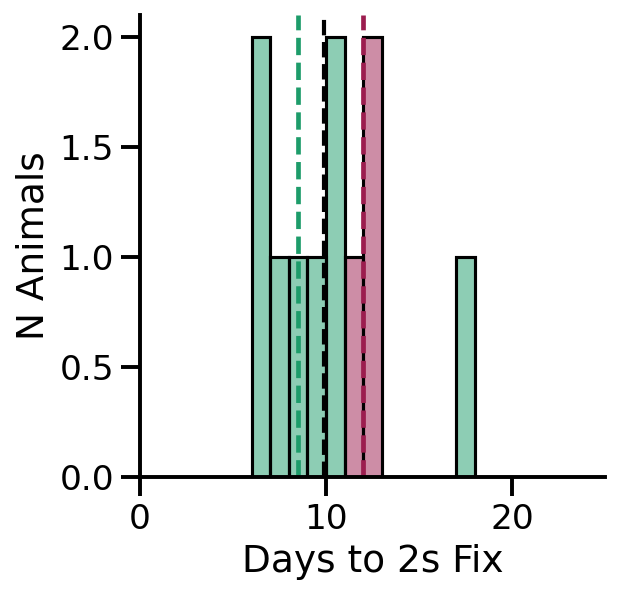

In [326]:
target_df = (
    tdf.query("fixation_dur > 2")
    .groupby(["animal_id", "fix_experiment"])
    .days_relative_to_stage_5.min()
    .reset_index()
    .rename(columns={"days_relative_to_stage_5": "days_to_target"})
)

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sns.histplot(
    data=target_df,
    x="days_to_target",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    binwidth=1,
)
# plot median line for each fix experiment
for ii, (exp, sub_df) in enumerate(target_df.groupby("fix_experiment")):
    median = sub_df.days_to_target.median()
    print(median)
    ax.axvline(median, color=pu.ALPHA_PALLETTE[ii], linestyle="--")

mean = target_df.days_to_target.mean()
print(mean)
ax.axvline(mean, color="black", lw=2, linestyle="--")


ax.set(xlim=(0, 25), xlabel="Days to 2s Fix", ylabel="N Animals")
ax.get_legend().remove()
sns.despine()